In [1354]:
#Import necessary modules and codes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

In [1355]:
df=pd.read_csv("Project 1 Data - Ads-2.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47495 entries, 0 to 47494
Data columns (total 39 columns):
Account                               47495 non-null object
Campaign                              47495 non-null object
Search keyword                        47356 non-null object
Headline                              19648 non-null object
Headline 1                            47495 non-null object
Headline 2                            47495 non-null object
Expanded text ad headline 3           47495 non-null object
Responsive Search Ad headline 1       47495 non-null object
Responsive Search Ad headline 2       47495 non-null object
Responsive Search Ad headline 3       47495 non-null object
Responsive Search Ad headline 4       47495 non-null object
Responsive Search Ad headline 5       47495 non-null object
Responsive Search Ad headline 6       47495 non-null object
Responsive Search Ad headline 7       47495 non-null object
Responsive Search Ad headline 8       47495 non-nul

In [1356]:
df.head(5)

,Account,Campaign,Search keyword,Headline,Headline 1,Headline 2,Expanded text ad headline 3,Responsive Search Ad headline 1,Responsive Search Ad headline 2,Responsive Search Ad headline 3,...,Start date,End Date,Impressions,Clicks,Cost,Avg. Cost,CTR,Conversions,Cost / conv.,Conv. rate
0,My Energy Comparison - MIC,My Energy Comparison UK - Business Energy (BMM),=+electrical +commercial,NaN,Compare Commercial Energy.,Review Tariffs then Switch.,My Energy Comparison,--,--,--,...,26/02/2019,--,191.0,1.0,6.08,6.08,0.0052,0.0,0.0,0.0
1,My Energy Comparison - MIC,My Energy Comparison UK - Business Energy (BMM),=+commercial +electricity,NaN,Compare Commercial Electricity,Review Tariffs then Switch.,My Energy Comparison,--,--,--,...,26/02/2019,--,166.0,1.0,11.57,11.57,0.0060,0.0,0.0,0.0
2,My Energy Comparison - MIC,My Energy Comparison UK - Business Energy (BMM),=+commercial +electricity,NaN,Compare Commercial Electricity,Review Tariffs then Switch.,My Energy Comparison,--,--,--,...,26/02/2019,--,171.0,1.0,2.59,2.59,0.0058,0.0,0.0,0.0
3,My Energy Comparison - MIC,My Energy Comparison UK - Business Energy (BMM),=+Business +Energy +Providers,NaN,Compare Business Energy Prices,Review Tariffs then Switch.,My Energy Comparison,--,--,--,...,26/02/2019,--,18.0,1.0,12.70,12.70,0.0556,0.0,0.0,0.0
4,My Energy Comparison - MIC,My Energy Comparison UK - Business Energy (BMM),=+electrical +commercial,NaN,Commercial Electricity Bills,Review Tariffs then Switch.,My Energy Comparison,--,--,--,...,26/02/2019,--,241.0,2.0,17.40,8.70,0.0083,0.0,0.0,0.0


# Data examination

## Check missing values

In [1357]:
df.isnull().sum() 

Account                                   0
Campaign                                  0
Search keyword                          139
Headline                              27847
Headline 1                                0
Headline 2                                0
Expanded text ad headline 3               0
Responsive Search Ad headline 1           0
Responsive Search Ad headline 2           0
Responsive Search Ad headline 3           0
Responsive Search Ad headline 4           0
Responsive Search Ad headline 5           0
Responsive Search Ad headline 6           0
Responsive Search Ad headline 7           0
Responsive Search Ad headline 8           0
Responsive Search Ad headline 9           0
Responsive Search Ad description 1        0
Responsive Search Ad description 2        0
Responsive Search Ad description 3        0
Responsive Search Ad description 4        0
Description                               0
Expanded text ad description 2          142
Description line 1              

We can find some value marked as '--' in the dataframe, that actually means "NaN", but they are not counted as 'non available' for now, let's replace those value first.

In [1358]:
for i in df.columns:
    df[i][df[i]=='--']=None
df.isnull().sum() 

/Users/xcding/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/xcding/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


Account                                   0
Campaign                                  0
Search keyword                          139
Headline                              27914
Headline 1                            22837
Headline 2                            22924
Expanded text ad headline 3           37746
Responsive Search Ad headline 1       44164
Responsive Search Ad headline 2       44164
Responsive Search Ad headline 3       44165
Responsive Search Ad headline 4       44720
Responsive Search Ad headline 5       45151
Responsive Search Ad headline 6       45160
Responsive Search Ad headline 7       47448
Responsive Search Ad headline 8       47475
Responsive Search Ad headline 9       47472
Responsive Search Ad description 1    44164
Responsive Search Ad description 2    44167
Responsive Search Ad description 3    45152
Responsive Search Ad description 4    45116
Description                           22924
Expanded text ad description 2        37901
Description line 1              

Our purpose in this case is to predict click through rate(CTR) and conversion rate, therefore for those accounts missing CTR and conversions, I would just remove them.

In [1359]:
df = df[df['Conv. rate'].notna()]
df.isnull().sum()

Account                                   0
Campaign                                  0
Search keyword                            0
Headline                              27847
Headline 1                            22770
Headline 2                            22770
Expanded text ad headline 3           37549
Responsive Search Ad headline 1       43967
Responsive Search Ad headline 2       43967
Responsive Search Ad headline 3       43967
Responsive Search Ad headline 4       44520
Responsive Search Ad headline 5       44951
Responsive Search Ad headline 6       44957
Responsive Search Ad headline 7       47245
Responsive Search Ad headline 8       47272
Responsive Search Ad headline 9       47275
Responsive Search Ad description 1    43967
Responsive Search Ad description 2    43967
Responsive Search Ad description 3    44952
Responsive Search Ad description 4    45049
Description                           22770
Expanded text ad description 2        37759
Description line 1              

In [1360]:
#see each column closer to check there is no NA values
df['Search keyword'].value_counts()

#NAME?                                   4690
cheap car insurance                       163
car insurance                             140
tesco car insurance                       124
cheap insurance                           109
insurance                                  93
insurance quotes                           86
tesco insurance                            85
go compare                                 85
insuro                                     82
insurance quote                            80
gocompare                                  74
very cheap car insurance                   69
insurance car                              68
cheapest insurance company                 63
car insurance companies                    63
car insurance uk                           62
cheap insurance quotes                     58
admiral car insurance                      58
#ERROR!                                    58
car insurance comparison sites             57
insuro car insurance              

In [1361]:
#delete columns with unkown search keyword
df['Search keyword'] = df['Search keyword'].replace({'#NAME?': None})
df['Search keyword'] = df['Search keyword'].replace({'#ERROR!': None})
#check if successfully set 'NAME' 'ERROR' as NA
df['Search keyword'].value_counts()
#drop NAs 
df = df.dropna(how='any', subset=['Search keyword'])
df.isnull().sum()

cheap car insurance                         163
car insurance                               140
tesco car insurance                         124
cheap insurance                             109
insurance                                    93
insurance quotes                             86
tesco insurance                              85
go compare                                   85
insuro                                       82
insurance quote                              80
gocompare                                    74
very cheap car insurance                     69
insurance car                                68
car insurance companies                      63
cheapest insurance company                   63
car insurance uk                             62
cheap insurance quotes                       58
admiral car insurance                        58
car insurance comparison sites               57
insuro car insurance                         55
cheapest car insurance                  

Account                                   0
Campaign                                  0
Search keyword                            0
Headline                              24888
Headline 1                            20595
Headline 2                            20595
Expanded text ad headline 3           33857
Responsive Search Ad headline 1       39605
Responsive Search Ad headline 2       39605
Responsive Search Ad headline 3       39605
Responsive Search Ad headline 4       40058
Responsive Search Ad headline 5       40421
Responsive Search Ad headline 6       40426
Responsive Search Ad headline 7       42497
Responsive Search Ad headline 8       42524
Responsive Search Ad headline 9       42527
Responsive Search Ad description 1    39605
Responsive Search Ad description 2    39605
Responsive Search Ad description 3    40422
Responsive Search Ad description 4    40518
Description                           20595
Expanded text ad description 2        33990
Description line 1              

From literature review we know that the old version of google ads only had one headline and one description, but the current version allows you to add upto three headlines and two descriptions, so those accounts which have headlines would not have headline 1, 2 and 3. Businesses may also use responsive search ads sometimes, each account can set upto 15 headlines and 4 descriptions for responsive search ads, and they need to have at least 2 headlines and 1 descriptions.  Therefore, conlume 'responsive search ad' headline 1 and 2, and description 1 have the same number of non-missing values.

First, we need to make sure the dataset is a complete one, in other words, the old version search ads, normal search ads and responsive searh ads should add up to the total number of accouts. We can simply check this by adding number of available values of column 'Headline', 'Headline 1' and 'Responsive Search Ad headline 1'. 

In [1362]:
42544*3-24888-20595-39605

42544

By checking the values of 'Headline' column, we can see that the concept of headline is all about car insurance, which refer to the company Insuro. So only Insuro have used the old version of google search Ads before.

# Data preperation

In [1363]:
#Check the data type of each column 
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42544 entries, 0 to 47494
Data columns (total 39 columns):
Account                               42544 non-null object
Campaign                              42544 non-null object
Search keyword                        42544 non-null object
Headline                              17656 non-null object
Headline 1                            21949 non-null object
Headline 2                            21949 non-null object
Expanded text ad headline 3           8687 non-null object
Responsive Search Ad headline 1       2939 non-null object
Responsive Search Ad headline 2       2939 non-null object
Responsive Search Ad headline 3       2939 non-null object
Responsive Search Ad headline 4       2486 non-null object
Responsive Search Ad headline 5       2123 non-null object
Responsive Search Ad headline 6       2118 non-null object
Responsive Search Ad headline 7       47 non-null object
Responsive Search Ad headline 8       20 non-null object
Resp

,Impressions,Clicks,Cost,Avg. Cost,CTR,Conversions,Cost / conv.,Conv. rate
count,4.254400e+04,42544.000000,42544.000000,42544.000000,42544.000000,42544.000000,42544.000000,42544.000000
mean,1.005782e+03,28.697349,18.755179,0.826555,0.099970,13.973060,1.133799,0.314679
std,1.225039e+04,281.078158,184.880379,1.637079,0.177301,162.081291,10.800761,0.458665
min,1.000000e+00,1.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000
25%,2.100000e+01,1.000000,0.580000,0.380000,0.019600,0.000000,0.000000,0.000000
50%,7.000000e+01,2.000000,1.300000,0.540000,0.041050,1.000000,0.180000,0.105300
75%,2.270000e+02,6.000000,3.780000,0.710000,0.096600,2.000000,1.150000,0.500000
max,1.203326e+06,19971.000000,12023.890000,65.580000,2.000000,15677.000000,839.800000,15.000000


We can see that impressions, clicks, costs, average cost, CTR, conversions, cost per conversion and conversion rate are recognised as float, therefore we only need to worry about the 'objects'.

# Feature extraction and engineering

In order to find the ideal structure of google search Ad, I would like to identify a few widely used indicators in Searching Engine Marketing, these indicators are normally some keywords and conditions, we would see if these keywords or conditions contribute to the final CTR and coversion rate from this research.

# Natural Language Processing

 In this project, some text processing and embedding techniques of Natural Language Processing are used to extract features from headlines and descriptions of search ads. This step aims to extract work tokens, count-based and statistical features for predicting conversion.

In [1364]:
#generate a new data frame which contain the text ads only
dftext=df[['Headline',
'Headline 1',
'Headline 2',
'Expanded text ad headline 3',
'Responsive Search Ad headline 1',
'Responsive Search Ad headline 2',
'Responsive Search Ad headline 3',
'Responsive Search Ad headline 4',
'Responsive Search Ad headline 5',
'Responsive Search Ad headline 6',
'Responsive Search Ad headline 7',
'Responsive Search Ad headline 8',
'Responsive Search Ad headline 9',
'Responsive Search Ad description 1',
'Responsive Search Ad description 2',
'Responsive Search Ad description 3',
'Responsive Search Ad description 4',
'Description',
'Expanded text ad description 2',
'Description line 1',
'Description line 2']].copy()
dftext.head()

,Headline,Headline 1,Headline 2,Expanded text ad headline 3,Responsive Search Ad headline 1,Responsive Search Ad headline 2,Responsive Search Ad headline 3,Responsive Search Ad headline 4,Responsive Search Ad headline 5,Responsive Search Ad headline 6,...,Responsive Search Ad headline 8,Responsive Search Ad headline 9,Responsive Search Ad description 1,Responsive Search Ad description 2,Responsive Search Ad description 3,Responsive Search Ad description 4,Description,Expanded text ad description 2,Description line 1,Description line 2
0,NaN,Compare Commercial Energy.,Review Tariffs then Switch.,My Energy Comparison,None,None,None,None,None,None,...,None,None,None,None,None,None,Price Match Guaranteed or £1000. Save Over 40%...,Compare Business Energy & Business Gas Online ...,NaN,NaN
1,NaN,Compare Commercial Electricity,Review Tariffs then Switch.,My Energy Comparison,None,None,None,None,None,None,...,None,None,None,None,None,None,Price Match Guaranteed or £1000. Save Over 40%...,Compare Business Energy & Business Gas Online ...,NaN,NaN
2,NaN,Compare Commercial Electricity,Review Tariffs then Switch.,My Energy Comparison,None,None,None,None,None,None,...,None,None,None,None,None,None,Price Match Guaranteed or £1000. Save Over 40%...,Compare Business Energy & Business Gas Online ...,NaN,NaN
3,NaN,Compare Business Energy Prices,Review Tariffs then Switch.,My Energy Comparison,None,None,None,None,None,None,...,None,None,None,None,None,None,Price Match Guaranteed or £1000. Save Over 40%...,Compare Business Energy & Business Gas Online ...,NaN,NaN
4,NaN,Commercial Electricity Bills,Review Tariffs then Switch.,My Energy Comparison,None,None,None,None,None,None,...,None,None,None,None,None,None,"Commercial Electricity Bills, Price Match Guar...",Save Over 40%. Compare in 5 Minutes or Less.,NaN,NaN


## import packages needed


In [1365]:
!pip3 install nltk
import nltk
from nltk.stem.wordnet import WordNetLemmatizer 
lem = WordNetLemmatizer()
from nltk import word_tokenize, pos_tag
!pip install textblob
from textblob import TextBlob
from textblob.classifiers import NaiveBayesClassifier as NBC

## Noise Removal: Punctuations

In [1366]:
#noise removal--punctuations
for i in dftext.columns:
    dftext[i]=dftext[i].str.replace('[^\w\s]',' ')
dftext['Headline 1'].value_counts()

No Deposit Car Insurance                    4327
No Deposit Cheap Car Insurance              3059
 KeyWord No Deposit Car Insurance           2733
No Deposit Car Insurance                     866
Compare Home Electricity Rates               466
Need No Deposit Car Insurance                431
Want Cheap Car Insurance                     422
Compare Business Energy Prices               407
Compare Business Electricity                 359
Cheap Car Insurance Quote                    350
Can You Get Cheaper Insurance                274
Cheap No Deposit Car Insurance               263
Compare Commercial Electricity               218
Cheap Car Insurance                          186
Compare Car Insurance Quotes                 155
Compare Home Energy Prices                   154
 KeyWord Need No Deposit Car Insurance       150
 KeyWord Truck Insurance                     149
 KeyWord Black Box Insurance                 143
Compare Commercial Energy                    129
 KeyWord Cheap Car I

In [1367]:
dftext['Headline'] = dftext['Headline'].replace({np.nan: None})
dftext['Description line 1'] = dftext['Description line 1'].replace({np.nan: None})
dftext['Description line 2'] = dftext['Description line 2'].replace({np.nan: None})
dftext['Headline'].head()
dftext['Description line 1'].head()
dftext['Description line 2'].head()

0    None
1    None
2    None
3    None
4    None
Name: Headline, dtype: object

0    None
1    None
2    None
3    None
4    None
Name: Description line 1, dtype: object

0    None
1    None
2    None
3    None
4    None
Name: Description line 2, dtype: object

## Text Pre-processing 

Before feature extraction, we need to process the text data and make it ready for feature extraction. The following steps include:
1. Merge the headline columns to one column, merge the description columns to one column;
2. Text tokenisation;
3. Remove stop words from text;
4. Generate list of list format of text data for word embedding;
5. Create a copy of text tokens and undergo lemmatization;

In [1368]:
#set those 'nan' recognized as string into Non-available data
conv = lambda i : i or ''
for column in dftext.columns:
    dftext[column]  = [conv(i) for i in dftext[column]]
# For each row, combine all the columns into one column
df_all = dftext.apply(lambda x: ','.join(x.astype(str)), axis=1)
# Store them in a pandas dataframe
df_clean = pd.DataFrame({'clean': df_all})
# Create the list of list format of the custom corpus for gensim modeling 
sent = [row.split(',') for row in df_clean['clean']]

In [1369]:
#check data form after merging
df_all.head()
df_clean.head()
sent[:5]

0    ,Compare Commercial Energy ,Review Tariffs the...
1    ,Compare Commercial Electricity,Review Tariffs...
2    ,Compare Commercial Electricity,Review Tariffs...
3    ,Compare Business Energy Prices,Review Tariffs...
4    ,Commercial Electricity Bills,Review Tariffs t...
dtype: object

,clean
0,",Compare Commercial Energy ,Review Tariffs the..."
1,",Compare Commercial Electricity,Review Tariffs..."
2,",Compare Commercial Electricity,Review Tariffs..."
3,",Compare Business Energy Prices,Review Tariffs..."
4,",Commercial Electricity Bills,Review Tariffs t..."


[['',
  'Compare Commercial Energy ',
  'Review Tariffs then Switch ',
  'My Energy Comparison',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  'Price Match Guaranteed or  1000  Save Over 40   Compare in 5 Minutes or Less ',
  'Compare Business Energy   Business Gas Online for Free ',
  '',
  ''],
 ['',
  'Compare Commercial Electricity',
  'Review Tariffs then Switch ',
  'My Energy Comparison',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  'Price Match Guaranteed or  1000  Save Over 40   Compare in 5 Minutes or Less ',
  'Compare Business Energy   Business Gas Online for Free ',
  '',
  ''],
 ['',
  'Compare Commercial Electricity',
  'Review Tariffs then Switch ',
  'My Energy Comparison',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  '',
  'Price Match Guaranteed or  1000  Save Over 40   Compare in 5 Minutes or Less ',
  'Compare Business Energy   Business Gas Online for Free ',
  '',
  '

In [1370]:
#tokenisation
from nltk.tokenize import word_tokenize
df_clean['clean']=df_clean['clean'].astype('str')
df_clean['clean']=df_clean['clean'].str.replace('[^\w\s]',' ')
df_clean.head()
def custom_tokenize(text):
    if not text:
        print('The text to be tokenized is a None type. Defaulting to blank string.')
        text = ''
    return word_tokenize(text)
df_clean['clean'] = df_clean['clean'].apply(custom_tokenize)

#stop words removal
nltk.download('stopwords')
from nltk.corpus import stopwords
tokens= [word for word in df_clean['clean'] if not word in stopwords.words()]
tokens[:5]

,clean
0,Compare Commercial Energy Review Tariffs the...
1,Compare Commercial Electricity Review Tariffs...
2,Compare Commercial Electricity Review Tariffs...
3,Compare Business Energy Prices Review Tariffs...
4,Commercial Electricity Bills Review Tariffs t...


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/xcding/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[['Compare',
  'Commercial',
  'Energy',
  'Review',
  'Tariffs',
  'then',
  'Switch',
  'My',
  'Energy',
  'Comparison',
  'Price',
  'Match',
  'Guaranteed',
  'or',
  '1000',
  'Save',
  'Over',
  '40',
  'Compare',
  'in',
  '5',
  'Minutes',
  'or',
  'Less',
  'Compare',
  'Business',
  'Energy',
  'Business',
  'Gas',
  'Online',
  'for',
  'Free'],
 ['Compare',
  'Commercial',
  'Electricity',
  'Review',
  'Tariffs',
  'then',
  'Switch',
  'My',
  'Energy',
  'Comparison',
  'Price',
  'Match',
  'Guaranteed',
  'or',
  '1000',
  'Save',
  'Over',
  '40',
  'Compare',
  'in',
  '5',
  'Minutes',
  'or',
  'Less',
  'Compare',
  'Business',
  'Energy',
  'Business',
  'Gas',
  'Online',
  'for',
  'Free'],
 ['Compare',
  'Commercial',
  'Electricity',
  'Review',
  'Tariffs',
  'then',
  'Switch',
  'My',
  'Energy',
  'Comparison',
  'Price',
  'Match',
  'Guaranteed',
  'or',
  '1000',
  'Save',
  'Over',
  '40',
  'Compare',
  'in',
  '5',
  'Minutes',
  'or',
  'Less',
 

In [1371]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

tokens=pd.Series(tokens)
tokens=pd.DataFrame({'text':tokens.values})
df_tokens = tokens.apply(lambda x: ','.join(x.astype(str)), axis=1)
lemma = df_tokens.apply(lemmatize_text)
lemma[:5]

0    [['Compare',, 'Commercial',, 'Energy',, 'Revie...
1    [['Compare',, 'Commercial',, 'Electricity',, '...
2    [['Compare',, 'Commercial',, 'Electricity',, '...
3    [['Compare',, 'Business',, 'Energy',, 'Prices'...
4    [['Commercial',, 'Electricity',, 'Bills',, 'Re...
dtype: object

## Bag of words as features

In [1372]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
lemma=pd.DataFrame({'text':lemma.values})
df_lemma = lemma.apply(lambda x: ',,'.join(x.astype(str)), axis=1)
X = vectorizer.fit_transform(df_lemma)
print(vectorizer.get_feature_names())
count_vect = pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names())

['027', '10', '100', '1000', '100s', '1027', '120', '125cc', '130', '140', '15', '150', '18', '18s', '1k', '1st', '20', '200', '2009', '25', '30', '35', '350', '3rd', '40', '4x4', '50', '500', '55', '60', '60s', '70', '75', '80', '85', '90', '99', 'about', 'accidents', 'accurate', 'achieve', 'achieved', 'achieving', 'across', 'ads', 'adsa', 'advertising', 'advice', 'adwords', 'affiliate', 'affordable', 'against', 'age', 'agencies', 'agency', 'all', 'an', 'and', 'any', 'appliance', 'apply', 'are', 'aren', 'around', 'arriva', 'as', 'asda', 'assurance', 'at', 'audit', 'audits', 'auto', 'autonet', 'available', 'average', 'award', 'awardwinning', 'away', 'axa', 'axas', 'b2b', 'back', 'backlink', 'bad', 'balancing', 'barge', 'based', 'bespoke', 'best', 'big', 'bike', 'bikes', 'bikesure', 'bill', 'bills', 'bing', 'bit', 'black', 'blackburn', 'blackpool', 'bmw', 'boat', 'boiler', 'bolton', 'bonus', 'box', 'bradford', 'breakdown', 'breakdowns', 'broker', 'brokers', 'budget', 'budgets', 'buildin

In [1373]:
#check the count-based features dataframe
count_vect.head()

,027,10,100,1000,100s,1027,120,125cc,130,140,...,year,years,york,yorkshire,you,young,your,yourself,ys,zero
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1374]:
#remove number string columns
count_vect=count_vect.drop(['027', '10', '100', '1000', '100s', '1027', '120', '125cc', '130', '140', '15', 
                            '150', '18', '18s', '1k', '1st', '20', '200', '2009', '25', '30', '35', '350', '3rd', '40', '4x4', 
                            '50', '500', '55', '60', '60s', '70', '75', '80', '85', '90', '99'], axis=1)
count_vect.info()
count_vect.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42544 entries, 0 to 42543
Columns: 681 entries, about to zero
dtypes: int64(681)
memory usage: 221.0 MB


,about,accidents,accurate,achieve,achieved,achieving,across,ads,adsa,advertising,...,year,years,york,yorkshire,you,young,your,yourself,ys,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Pos tags as features

In [1375]:
#pos-tag each word in text and add it as a column
from nltk import pos_tag, pos_tag_sents
df_clean = pd.DataFrame({'clean': df_all})
df_clean['pos_tags'] = (df_clean['clean'].str.replace('[^\w\s]',' ')
                  .apply(word_tokenize)
                  .apply(pos_tag)
                  .apply(lambda x: ' '.join([y[1] for y in x])))
df_clean.head(10)

,clean,pos_tags
0,",Compare Commercial Energy ,Review Tariffs the...",NNP NNP NNP NNP NNP RB NNP NNP NNP NNP NNP NNP...
1,",Compare Commercial Electricity,Review Tariffs...",NNP NNP NNP NNP NNP RB NNP NNP NNP NNP NNP NNP...
2,",Compare Commercial Electricity,Review Tariffs...",NNP NNP NNP NNP NNP RB NNP NNP NNP NNP NNP NNP...
3,",Compare Business Energy Prices,Review Tariffs...",NNP NNP NNP NNP NNP NNP RB NNP NNP NNP NNP NNP...
4,",Commercial Electricity Bills,Review Tariffs t...",JJ NNP NNP NNP NNP RB NNP NNP NNP NNP NNP NNP ...
5,",My Energy Comparison,Gas Electricity For Bu...",PRP$ NNP NNP NNP NNP IN NNP NNP NNP NNP NNP NN...
6,",Commercial Electricity Bills,Review Tariffs t...",JJ NNP NNP NNP NNP RB NNP NNP NNP NNP NNP NNP ...
7,",My Energy Comparison,Gas Electricity For Bu...",PRP$ NNP NNP NNP NNP IN NNP NNP NNP NNP NNP NN...
8,",Compare Business Energy Prices,Review Tariffs...",NNP NNP NNP NNP NNP NNP RB NNP NNP NNP NNP NNP...
9,",Compare Business Energy Prices,Review Tariffs...",NNP NNP NNP NNP NNP NNP RB NNP NNP NNP NNP NNP...


In [1376]:
#create columns of each tag with the number of tags
df_clean['pos_tags']=df_clean['pos_tags'].str.replace('[^\w\s]',' ')
df_clean['NNP'] = df_clean['pos_tags'].str.count("NNP")
df_clean['NNPS'] = df_clean['pos_tags'].str.count("NNPS")
df_clean['VB'] = df_clean['pos_tags'].str.count("VB")
df_clean['VBG'] = df_clean['pos_tags'].str.count("VBG")
df_clean['VBN'] = df_clean['pos_tags'].str.count("VBN")
df_clean['VBZ'] = df_clean['pos_tags'].str.count("VBZ")
df_clean['VBD'] = df_clean['pos_tags'].str.count("VBD")
df_clean['VBP'] = df_clean['pos_tags'].str.count("VBP")
df_clean['WRB'] = df_clean['pos_tags'].str.count("WRB")
df_clean['JJ'] = df_clean['pos_tags'].str.count("JJ")
df_clean['JJR'] = df_clean['pos_tags'].str.count("JJR")
df_clean['JJS'] = df_clean['pos_tags'].str.count("JJS")
df_clean['RB'] = df_clean['pos_tags'].str.count("RB")
df_clean['RBR'] = df_clean['pos_tags'].str.count("RBR")
df_clean['RBS'] = df_clean['pos_tags'].str.count("RBS")
#check the column values
df_clean.head()

,clean,pos_tags,NNP,NNPS,VB,VBG,VBN,VBZ,VBD,VBP,WRB,JJ,JJR,JJS,RB,RBR,RBS
0,",Compare Commercial Energy ,Review Tariffs the...",NNP NNP NNP NNP NNP RB NNP NNP NNP NNP NNP NNP...,24,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,",Compare Commercial Electricity,Review Tariffs...",NNP NNP NNP NNP NNP RB NNP NNP NNP NNP NNP NNP...,24,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,",Compare Commercial Electricity,Review Tariffs...",NNP NNP NNP NNP NNP RB NNP NNP NNP NNP NNP NNP...,24,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,",Compare Business Energy Prices,Review Tariffs...",NNP NNP NNP NNP NNP NNP RB NNP NNP NNP NNP NNP...,25,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,",Commercial Electricity Bills,Review Tariffs t...",JJ NNP NNP NNP NNP RB NNP NNP NNP NNP NNP NNP ...,18,1,0,0,0,0,0,0,0,2,1,0,1,0,0


In [1377]:
#verb in all tense can be combined to a column
df_clean['VB_total']=df_clean['VB']+df_clean['VBN']+df_clean['VBZ']+df_clean['VBD']+df_clean['VBP']
#nouns can be combines to one column
df_clean['NNP_total']=df_clean['NNP']+df_clean['NNPS']
#drop original text column and pos_tags column
del df_clean['pos_tags']
del df_clean['clean']
df_clean.head()

,NNP,NNPS,VB,VBG,VBN,VBZ,VBD,VBP,WRB,JJ,JJR,JJS,RB,RBR,RBS,VB_total,NNP_total
0,24,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,25
1,24,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,25
2,24,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,25
3,25,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,26
4,18,1,0,0,0,0,0,0,0,2,1,0,1,0,0,0,19


In [1378]:
#drop the verb and noun columns (that have been added up)
df_clean=df_clean.drop(['VB','VBN','VBZ','VBD','VBP','NNP','NNPS'],axis=1)

# Rule-based feature extraction

The indicators used are:
#Questions in headlines or descriptions; (indentified by question mark "?");
#Calls to action-'click here','find out more', 'sign up', 'get quotes', 'go compare' (identified by the action wordings:click, sign, compare);
#Numbers in headlines or descriptions (in arabic numerals);
#Number of times keyword is used (refers to 'search keyword');
#Use of benefits wording in headlines and descriptions, such as 'free', 'no deposit';
#USe of words about urgency and scarity in headlines and descriptions, such as 'Now', 'Moment', 'Today';
#Show social proof in headlines and descriptions, such as 'since 2010', 'award winning', 'worldwide','professional';
#Use of powerful words in headlines and descriptions: Greed Words, Sloth Words, Vanity Words, etc;
#Use of keyword in URL;

In [1379]:
#generate a new data frame which contain the text ads only
dftext1=df.loc[: , 'Headline' : 'Description line 2']
for i in dftext1.columns:
    dftext1[i] = dftext1[i].apply(str)
dftext_h=dftext1.loc[: , 'Headline' : 'Responsive Search Ad headline 9']
dftext_d=dftext1.loc[: , 'Responsive Search Ad description 1' : 'Description line 2']
dftext_h['Headline'] = dftext_h['Headline'].replace({'nan': None})
dftext_d['Description line 1'] = dftext_d['Description line 1'].replace({'nan': None})
dftext_d['Description line 2'] = dftext_d['Description line 2'].replace({'nan': None})
dftext_h.head()
dftext_d.head()

/Users/xcding/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/xcding/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/xcding/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org

,Headline,Headline 1,Headline 2,Expanded text ad headline 3,Responsive Search Ad headline 1,Responsive Search Ad headline 2,Responsive Search Ad headline 3,Responsive Search Ad headline 4,Responsive Search Ad headline 5,Responsive Search Ad headline 6,Responsive Search Ad headline 7,Responsive Search Ad headline 8,Responsive Search Ad headline 9
0,None,Compare Commercial Energy.,Review Tariffs then Switch.,My Energy Comparison,None,None,None,None,None,None,None,None,None
1,None,Compare Commercial Electricity,Review Tariffs then Switch.,My Energy Comparison,None,None,None,None,None,None,None,None,None
2,None,Compare Commercial Electricity,Review Tariffs then Switch.,My Energy Comparison,None,None,None,None,None,None,None,None,None
3,None,Compare Business Energy Prices,Review Tariffs then Switch.,My Energy Comparison,None,None,None,None,None,None,None,None,None
4,None,Commercial Electricity Bills,Review Tariffs then Switch.,My Energy Comparison,None,None,None,None,None,None,None,None,None


,Responsive Search Ad description 1,Responsive Search Ad description 2,Responsive Search Ad description 3,Responsive Search Ad description 4,Description,Expanded text ad description 2,Description line 1,Description line 2
0,None,None,None,None,Price Match Guaranteed or £1000. Save Over 40%...,Compare Business Energy & Business Gas Online ...,None,None
1,None,None,None,None,Price Match Guaranteed or £1000. Save Over 40%...,Compare Business Energy & Business Gas Online ...,None,None
2,None,None,None,None,Price Match Guaranteed or £1000. Save Over 40%...,Compare Business Energy & Business Gas Online ...,None,None
3,None,None,None,None,Price Match Guaranteed or £1000. Save Over 40%...,Compare Business Energy & Business Gas Online ...,None,None
4,None,None,None,None,"Commercial Electricity Bills, Price Match Guar...",Save Over 40%. Compare in 5 Minutes or Less.,None,None


In [1380]:
#In order to find these indicators contain by each headlines and descritions, we need to have a look at the text first
df['Headline'].value_counts()
df['Headline 1'].value_counts()
df['Headline 2'].value_counts()
df['Responsive Search Ad headline 1'].value_counts()
#indicators we can find in these text: 
#incentive: 'no deposit', zero deposit, 'Award-winning', Award Winning, no down payment, no upfront cost, over xx% could save,
#question: want insurance? need insurance?
#action: compare insurance, get quotes, go compare
#location: UK, Sheffield, Burnley,Chester,Cumbria

{KeyWord:No Deposit Car Insurance}     4051
No Deposit Car Insurance               2773
Want Cheap Car Insurance?               480
Need Motorbike Insurance?               469
Compare Car Insurance Now               392
Cheap Car Insurance Quote               383
{KeyWord:Cheap Van Insurance}           322
{KeyWord:Horse Insurance}               321
Get Car Insurance Quotes                298
{KeyWord:Health Insurance}              288
{KeyWord:No Deposit Boat Insurance}     263
{KeyWord:Cheap Home Insurance}          244
{KeyWord:Classic Car Insurance}         239
{KeyWord:Life Insurance}                235
{KeyWord:Van Insurance Quotes}          216
{KeyWord:Truck Insurance}               210
{KeyWord:Motorbike Insurance}           201
{KeyWord:Professional Indemnity}        168
{KeyWord:Motor Trade Insurance}         166
{KeyWord:Caravan Insurance UK}          164
Are you a New Driver?                   153
{KeyWord:Taxi Insurance}                139
{KeyWord:Gap Insurance}         

No Deposit Car Insurance                    4327
No Deposit Cheap Car Insurance              3059
{KeyWord:No Deposit Car Insurance}          2733
No Deposit Car Insurance?                    866
Compare Home Electricity Rates               466
Need No Deposit Car Insurance?               431
Want Cheap Car Insurance?                    422
Compare Business Energy Prices               407
Compare Business Electricity.                359
Cheap Car Insurance Quote                    350
Can You Get Cheaper Insurance?               274
Cheap No Deposit Car Insurance               263
Compare Commercial Electricity               218
Cheap Car Insurance?                         186
Compare Car Insurance Quotes                 155
Compare Home Energy Prices.                  154
{KeyWord:Need No Deposit Car Insurance?}     150
{KeyWord:Truck Insurance}                    149
{KeyWord:Black Box Insurance}                143
Compare Commercial Energy.                   129
{KeyWord:Cheap Car I

Compare from over 100 Insurers    14258
Review Tariffs then Switch.        1284
Compare from over 120 Insurers     1189
Easily Review Tariffs & Switch      748
Compare from over 55 Insurers       442
Want the Best Car Insurance?        434
Compare Over 100 Insurers           278
Over 120 Insurers to Compare        256
Over 75% Could Save                 216
Compare Car Insurance Quotes.       216
Check Out Our Comparison Site       199
Over 100 Insurers to Compare        159
Compare Truck Insurance Today       156
Compare from over 20 Insurers       150
Award Winning PPC Services          136
Compare Cheap Car Insurance         130
Compare 100s of UK Providers         86
Compare Over 20 Insurers             85
Pay Monthly                          67
Compare Business Electricity         63
Compare HGV Insurance Today          57
Compare Van Insurance Quotes         57
Award Winning CRO Services           54
Compare Life Insurance Quotes.       46
Award Winning SEO Services           43


No Deposit Car Insurance                    986
No Deposit Cheap Car Insurance              827
Compare from over 100 Insurers              259
{KeyWord:No Deposit Car Insurance}          205
{Keyword:Compare Motorcycle Insurance}      103
Compare from 55+ Insurers                    81
Compare from over 55 Insurers                63
Quote In Less Than A Minute                  62
Compare from 50+ Insurers                    31
Over 75% Could Save                          29
Compare Motorcycle Insurance                 24
Compare from 100+ Insurers                   19
Can You Get Cheaper Insurance?               17
Car Insurance No Black Box                   16
Black Box Insurance                          15
{KeyWord:Cheap Car Insurance}                14
{KeyWord:Car Insurance For Occupation}       12
Want Cheap Car Insurance?                    11
2% of Profits To Charity.                    10
{KeyWord:Pay As You Go Car Insurance}         7
No Deposit Van Insurance                

Let's start with questions in the headlines and descriptions. It should be the most easily-located indicators, we can just use question mark "?" to locate it. 

In [1381]:
dftext_h['h-?']=dftext_h['Headline'].str.contains('\?', na=False)
dftext_h.loc[dftext_h['Headline 1'].str.contains('\?'), 'h-?'] = True
dftext_h.loc[dftext_h['Headline 2'].str.contains('\?'), 'h-?'] = True
dftext_h.loc[dftext_h['Expanded text ad headline 3'].str.contains('\?'), 'h-?'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 1'].str.contains('\?'), 'h-?'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 2'].str.contains('\?'), 'h-?'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 3'].str.contains('\?'), 'h-?'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 4'].str.contains('\?'), 'h-?'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 5'].str.contains('\?'), 'h-?'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 6'].str.contains('\?'), 'h-?'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 7'].str.contains('\?'), 'h-?'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 8'].str.contains('\?'), 'h-?'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 9'].str.contains('\?'), 'h-?'] = True
dftext_h['h-?'].value_counts()

/Users/xcding/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/xcding/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


False    36047
True      6497
Name: h-?, dtype: int64

In [1382]:
#let's create a dummy for question mark in descriptions, named 'd-?'
dftext_d['d-?']=False
dftext_d.loc[dftext_d['Description'].str.contains('\?'), 'd-?'] = True
dftext_d.loc[dftext_d['Description line 1'].str.contains('\?', na=False), 'd-?'] = True
dftext_d.loc[dftext_d['Description line 2'].str.contains('\?', na=False), 'd-?'] = True
dftext_d.loc[dftext_d['Expanded text ad description 2'].str.contains('\?'), 'd-?'] = True
dftext_d.loc[dftext_d['Responsive Search Ad description 1'].str.contains('\?'), 'd-?'] = True
dftext_d.loc[dftext_d['Responsive Search Ad description 2'].str.contains('\?'), 'd-?'] = True
dftext_d.loc[dftext_d['Responsive Search Ad description 3'].str.contains('\?'), 'd-?'] = True
dftext_d.loc[dftext_d['Responsive Search Ad description 4'].str.contains('\?'), 'd-?'] = True
dftext_d['d-?'].value_counts()

/Users/xcding/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


False    42205
True       339
Name: d-?, dtype: int64

Then let's look for the brand name of the companies by checking their accounts. Then, we can have a look at the headlines and descriptions to see if they contain the brand names.

In [1383]:
df['Account'].value_counts()

Insuro                        39622
My Energy Comparison - LES     2148
Novi.Digital                    644
My Energy Comparison - MIC      130
Name: Account, dtype: int64

Let's look at if the headlines and dexcriptions contain 'calls to action', usually a call to action needs an action word. We can see that the texts refer to 'calls to action' are quite similar in the headlines, they are: "compare insurance", "get quotes", "go compare", so I just use the action words to locate the calls to action: "comapre", "get","go".

In [1384]:
#generate a dummy variable for calls to actions in headline text, named 'h-action'
dftext_h['h-action']=dftext_h['Headline'].str.contains('Compare' or 'Get' or 'Go' or 'Find' or 'Apply',na=False, case=False)
dftext_h.loc[dftext_h['Headline 1'].str.contains('Compare' or 'Get' or 'Go' or 'Find' or 'Apply',case=False), 'h-action'] = True
dftext_h.loc[dftext_h['Headline 2'].str.contains('Compare' or 'Get' or 'Go' or 'Find' or 'Apply',case=False), 'h-action'] = True
dftext_h.loc[dftext_h['Expanded text ad headline 3'].str.contains('Compare' or 'Get' or 'Go' or 'Find' or 'Apply',case=False), 'h-action'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 1'].str.contains('Compare' or 'Get' or 'Go' or 'Find' or 'Apply',case=False), 'h-action'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 2'].str.contains('Compare' or 'Get' or 'Go' or 'Find' or 'Apply',case=False), 'h-action'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 3'].str.contains('Compare' or 'Get' or 'Go' or 'Find' or 'Apply',case=False), 'h-action'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 4'].str.contains('Compare' or 'Get' or 'Go' or 'Find' or 'Apply',case=False), 'h-action'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 5'].str.contains('Compare' or 'Get' or 'Go' or 'Find' or 'Apply',case=False), 'h-action'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 6'].str.contains('Compare' or 'Get' or 'Go' or 'Find' or 'Apply',case=False), 'h-action'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 7'].str.contains('Compare' or 'Get' or 'Go' or 'Find' or 'Apply',case=False), 'h-action'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 8'].str.contains('Compare' or 'Get' or 'Go' or 'Find' or 'Apply',case=False), 'h-action'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 9'].str.contains('Compare' or 'Get' or 'Go' or 'Find' or 'Apply',case=False), 'h-action'] = True
dftext_h['h-action'].value_counts()

/Users/xcding/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


True     24463
False    18081
Name: h-action, dtype: int64

The calls to action in description lines are quite simialr to the ones in headlines, main word used are 'compare insurance' 'get quotes', 'go compare', buy insurance', 'find the best deal' and 'Apply online', so I use 'compare', 'get', 'go', 'buy', 'find' and 'apply' to locate these actions.

In [1385]:
#create a dummy called 'd-action'
dftext_d['d-action']=dftext_d['Description'].str.contains('Compare' or 'Get' or 'Go' or 'Buy' or 'Find' or 'Apply', case=False)
dftext_d.loc[dftext_d['Description line 1'].str.contains('Compare' or 'Get' or 'Go'or 'Buy' or 'Find' or 'Apply', na=False, case=False), 'd-action'] = True
dftext_d.loc[dftext_d['Description line 2'].str.contains('Compare' or 'Get' or 'Go'or 'Buy' or 'Find' or 'Apply', na=False, case=False), 'd-action'] = True
dftext_d.loc[dftext_d['Expanded text ad description 2'].str.contains('Compare' or 'Get' or 'Go' or 'Buy' or 'Find' or 'Apply', case=False), 'd-action'] = True
dftext_d.loc[dftext_d['Responsive Search Ad description 1'].str.contains('Compare' or 'Get' or 'Go' or 'Buy' or 'Find' or 'Apply', case=False), 'd-action'] = True
dftext_d.loc[dftext_d['Responsive Search Ad description 2'].str.contains('Compare' or 'Get' or 'Go' or 'Buy' or 'Find' or 'Apply', case=False), 'd-action'] = True
dftext_d.loc[dftext_d['Responsive Search Ad description 3'].str.contains('Compare' or 'Get' or 'Go' or 'Buy' or 'Find' or 'Apply', case=False), 'd-action'] = True
dftext_d.loc[dftext_d['Responsive Search Ad description 4'].str.contains('Compare' or 'Get' or 'Go' or 'Buy' or 'Find' or 'Apply', case=False), 'd-action'] = True
dftext_d['d-action'].value_counts()

/Users/xcding/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


True     38810
False     3734
Name: d-action, dtype: int64

Then let's look at if there is any number in headline and description texts.

In [1386]:
#generate a dummy variable for numbers in headline text, named 'h-no.s'
dftext_h['h-no.s']=dftext_h['Headline'].str.contains('0' or '1' or '2' or '3' or '4' or '5' or '6' or '7' or '8' or '9',na=False)
dftext_h.loc[dftext_h['Headline 1'].str.contains('0' or '1' or '2' or '3' or '4' or '5' or '6' or '7' or '8' or '9'), 'h-no.s'] = True
dftext_h.loc[dftext_h['Headline 2'].str.contains('0' or '1' or '2' or '3' or '4' or '5' or '6' or '7' or '8' or '9'), 'h-no.s'] = True
dftext_h.loc[dftext_h['Expanded text ad headline 3'].str.contains('0' or '1' or '2' or '3' or '4' or '5' or '6' or '7' or '8' or '9'), 'h-no.s'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 1'].str.contains('0' or '1' or '2' or '3' or '4' or '5' or '6' or '7' or '8' or '9'), 'h-no.s'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 2'].str.contains('0' or '1' or '2' or '3' or '4' or '5' or '6' or '7' or '8' or '9'), 'h-no.s'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 3'].str.contains('0' or '1' or '2' or '3' or '4' or '5' or '6' or '7' or '8' or '9'), 'h-no.s'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 4'].str.contains('0' or '1' or '2' or '3' or '4' or '5' or '6' or '7' or '8' or '9'), 'h-no.s'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 5'].str.contains('0' or '1' or '2' or '3' or '4' or '5' or '6' or '7' or '8' or '9'), 'h-no.s'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 6'].str.contains('0' or '1' or '2' or '3' or '4' or '5' or '6' or '7' or '8' or '9'), 'h-no.s'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 7'].str.contains('0' or '1' or '2' or '3' or '4' or '5' or '6' or '7' or '8' or '9'), 'h-no.s'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 8'].str.contains('0' or '1' or '2' or '3' or '4' or '5' or '6' or '7' or '8' or '9'), 'h-no.s'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 9'].str.contains('0' or '1' or '2' or '3' or '4' or '5' or '6' or '7' or '8' or '9'), 'h-no.s'] = True
dftext_h['h-no.s'].value_counts()

/Users/xcding/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


False    22677
True     19867
Name: h-no.s, dtype: int64

In [1387]:
#generate a dummy variable for numbers in description text, named 'd-no.s'
dftext_d['d-no.s']=dftext_d['Description'].str.contains('0' or '1' or '2' or '3' or '4' or '5' or '6' or '7' or '8' or '9')
dftext_d.loc[dftext_d['Description line 1'].str.contains('0' or '1' or '2' or '3' or '4' or '5' or '6' or '7' or '8' or '9', na=False), 'd-no.s'] = True
dftext_d.loc[dftext_d['Description line 2'].str.contains('0' or '1' or '2' or '3' or '4' or '5' or '6' or '7' or '8' or '9', na=False), 'd-no.s'] = True
dftext_d.loc[dftext_d['Expanded text ad description 2'].str.contains('0' or '1' or '2' or '3' or '4' or '5' or '6' or '7' or '8' or '9'), 'd-no.s'] = True
dftext_d.loc[dftext_d['Responsive Search Ad description 1'].str.contains('0' or '1' or '2' or '3' or '4' or '5' or '6' or '7' or '8' or '9'), 'd-no.s'] = True
dftext_d.loc[dftext_d['Responsive Search Ad description 2'].str.contains('0' or '1' or '2' or '3' or '4' or '5' or '6' or '7' or '8' or '9'), 'd-no.s'] = True
dftext_d.loc[dftext_d['Responsive Search Ad description 3'].str.contains('0' or '1' or '2' or '3' or '4' or '5' or '6' or '7' or '8' or '9'), 'd-no.s'] = True
dftext_d.loc[dftext_d['Responsive Search Ad description 4'].str.contains('0' or '1' or '2' or '3' or '4' or '5' or '6' or '7' or '8' or '9'), 'd-no.s'] = True
dftext_d['d-no.s'].value_counts()

/Users/xcding/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


True     32881
False     9663
Name: d-no.s, dtype: int64

Then let's have a look at incentive wording, in this case, I would define 'incentive wordings' as awards or savings of money. Normally, these wording would be 'award-winning','no deposits','free', 'gifts' or 'coupons'. We should first check the frequently-used wording for the businesses in our data. 

In [1388]:
dftext_h['Headline'].value_counts()
dftext_h['Headline 1'].value_counts()
dftext_h['Headline 2'].value_counts()
dftext_h['Responsive Search Ad headline 1'].value_counts()
dftext_h['Responsive Search Ad headline 2'].value_counts()
dftext_h['Responsive Search Ad headline 7'].value_counts()
#incentive wording used in headline: 'no deposit', 'zero deposit', 'over xx% could save', 'award winning', 'Award-Winning', 
#'free gift', 'free gifts', 'no down payment'

{KeyWord:No Deposit Car Insurance}     4051
No Deposit Car Insurance               2773
Want Cheap Car Insurance?               480
Need Motorbike Insurance?               469
Compare Car Insurance Now               392
Cheap Car Insurance Quote               383
{KeyWord:Cheap Van Insurance}           322
{KeyWord:Horse Insurance}               321
Get Car Insurance Quotes                298
{KeyWord:Health Insurance}              288
{KeyWord:No Deposit Boat Insurance}     263
{KeyWord:Cheap Home Insurance}          244
{KeyWord:Classic Car Insurance}         239
{KeyWord:Life Insurance}                235
{KeyWord:Van Insurance Quotes}          216
{KeyWord:Truck Insurance}               210
{KeyWord:Motorbike Insurance}           201
{KeyWord:Professional Indemnity}        168
{KeyWord:Motor Trade Insurance}         166
{KeyWord:Caravan Insurance UK}          164
Are you a New Driver?                   153
{KeyWord:Taxi Insurance}                139
{KeyWord:Gap Insurance}         

None                                        20595
No Deposit Car Insurance                     4327
No Deposit Cheap Car Insurance               3059
{KeyWord:No Deposit Car Insurance}           2733
No Deposit Car Insurance?                     866
Compare Home Electricity Rates                466
Need No Deposit Car Insurance?                431
Want Cheap Car Insurance?                     422
Compare Business Energy Prices                407
Compare Business Electricity.                 359
Cheap Car Insurance Quote                     350
Can You Get Cheaper Insurance?                274
Cheap No Deposit Car Insurance                263
Compare Commercial Electricity                218
Cheap Car Insurance?                          186
Compare Car Insurance Quotes                  155
Compare Home Energy Prices.                   154
{KeyWord:Need No Deposit Car Insurance?}      150
{KeyWord:Truck Insurance}                     149
{KeyWord:Black Box Insurance}                 143


None                              20595
Compare from over 100 Insurers    14258
Review Tariffs then Switch.        1284
Compare from over 120 Insurers     1189
Easily Review Tariffs & Switch      748
Compare from over 55 Insurers       442
Want the Best Car Insurance?        434
Compare Over 100 Insurers           278
Over 120 Insurers to Compare        256
Over 75% Could Save                 216
Compare Car Insurance Quotes.       216
Check Out Our Comparison Site       199
Over 100 Insurers to Compare        159
Compare Truck Insurance Today       156
Compare from over 20 Insurers       150
Award Winning PPC Services          136
Compare Cheap Car Insurance         130
Compare 100s of UK Providers         86
Compare Over 20 Insurers             85
Pay Monthly                          67
Compare Business Electricity         63
Compare Van Insurance Quotes         57
Compare HGV Insurance Today          57
Award Winning CRO Services           54
Compare Life Insurance Quotes.       46


None                                        39605
No Deposit Car Insurance                      986
No Deposit Cheap Car Insurance                827
Compare from over 100 Insurers                259
{KeyWord:No Deposit Car Insurance}            205
{Keyword:Compare Motorcycle Insurance}        103
Compare from 55+ Insurers                      81
Compare from over 55 Insurers                  63
Quote In Less Than A Minute                    62
Compare from 50+ Insurers                      31
Over 75% Could Save                            29
Compare Motorcycle Insurance                   24
Compare from 100+ Insurers                     19
Can You Get Cheaper Insurance?                 17
Car Insurance No Black Box                     16
Black Box Insurance                            15
{KeyWord:Cheap Car Insurance}                  14
{KeyWord:Car Insurance For Occupation}         12
Want Cheap Car Insurance?                      11
2% of Profits To Charity.                      10


None                                       39605
Compare Car Insurance Quotes                1928
Quote In Less Than A Minute                  278
Compare from over 100 Insurers               184
{KeyWord:No Deposit Car Insurance}           121
Insuro                                        73
Low Cost Car Insurance                        60
Compare Van Insurance Quotes                  51
Compare from 100+ Insurers                    44
Low Deposit Car Insurance                     30
Compare Home Insurance Quotes                 27
Compare Over 100 Insurers                     24
Insuro Home Insurance                         19
1st Time Driver Car Insurance                 16
Car Insurance No Black Box                    13
Over 100 Insurers to Compare                  12
{KeyWord:Car Insurance No Black Box}          11
Eco Friendly Car Insurance                    10
{KeyWord:Home Insurance With Free Gift}        8
All Types of Insurance                         5
Compare Over 50 Insu

None                              42497
Over 100 Insurance Companies         10
Secure and Confidential               6
Retrieve Quotes                       4
Insuro                                3
House Insurance Free Gift             3
Car Insurance Comparison              3
Compare Online                        2
Home Insurance With Free Gifts        2
No Deposit Home Insurance             2
Home Insurance For Bad Credit         2
Check 100's of Insurers               2
High Risk Homeowners Insurance        1
Free Gift With House Insurance        1
House Insurance For Fire              1
Get A Quote                           1
Direct Home Insurance                 1
Complete Car Express                  1
Home Fire Insurance                   1
Nationwide Home Insurance             1
Name: Responsive Search Ad headline 7, dtype: int64

In [1389]:
dftext_d['Description'].value_counts()
dftext_d['Description line 1'].value_counts()
dftext_d['Description line 2'].value_counts()
dftext_d['Responsive Search Ad description 1'].value_counts()
dftext_d['Responsive Search Ad description 2'].value_counts()
dftext_d['Responsive Search Ad description 4'].value_counts()
#incentive wording used in description: no deposit, over xx% can save, over xx% could  save, save over xx%/£xx, save money,
#average savings of xx%, award-winning, save you a fortune

None                                                                                        20595
Compare No Deposit Car Insurance from 100+ Insurers Today. Over 75% Can Save.                7927
Compare Cheap Car Insurance Quotes from 100+ Insurers. Over 75% Can Save Today.              3118
Price Match Guaranteed or £1000. Save Over 40%. Compare in 5 Minutes or Less.                1084
Compare Cheap Car Insurance from 100 Insurers. Over 75% Can Save, So Could You.               750
Compare Cheap Car Insurance from 120 Insurers. Over 75% Can Save, So Could You                671
Compare Cheap Car Insurance from 100 Insurers. Over 75% Can Save, So Could You                550
Compare Car Insurance from 120 Insurers. Over 75% Can Save, So Could You                      498
Save Over 40%. Compare in 2 Minutes. Big 6 Electricity Suppliers, Eco & More.                 466
Compare Car Insurance from 100 Insurers. Over 75% Can Save, So Could You                      313
Compare Cheap No Dep

Compare 100+ Quotes and Save Money.    5107
Compare Quotes from 130+ Providers.    3656
Compare Quotes and Save Money Now.     1405
Compare Cheap Horse Insurance.          321
Compare Classic Car Insurance Now       317
Get The Best Health Insurance Quote     313
Compare over 80 Insurance Companies     295
Compare Quotes from 100+ Providers.     252
Compare 100+ Insurance Providers        248
Compare Cheap Home Insurance Now        232
Compare Life Insurance Quotes.          232
Compare Quotes from 100+ companies      228
Compare Income Protection Insurance     212
Compare Truck Insurance Today           210
Compare 150+ Van Insurance Quotes.      202
Compare Caravan Insurance Quotes        174
Compare 100 providers of Insurance.     167
Do you need New Driver Insurance?       153
Compare 100 Health Insurance Quotes     150
Cover yourself for accidents            146
Compare Quotes and Save Money.          144
Compare Taxi Insurance Quotes.          139
Compare Quotes with Insuro and S

Compare No Deposit Car Insurance       4678
Over 75% Could Save. Compare & Save    2581
Many Can Save Money on Insurance.      1404
Get The Best Deal And Save Money        737
Over 85% Can Save. Compare Today.       648
Start Saving Money Online Today.        499
Get The Best Deal And Save Money.       353
Horse & Rider Insurance. Get Cover.     349
Compare Boat Insurance Quotes Now.      348
Insuro Compares over 50 Providers       341
Save Money and Drive Away Happy.        324
Let Insuro Save You Money Today         301
Quick Form. Instant Results Online.     289
Find the Best Deal and Save Money.      254
Over 85% Can Save. Compare and Save     253
Find The Best Deal and Save Money.      249
Find The Best Deal and Save Money       201
Over 85% Can Save Money Instantly.      196
Let Insuro save you a fortune!          195
Apply Online and Get a Quote Today.     193
Compare Motor Trade Insurance Today     166
Professional Indemnity Insurance.       162
We specialise in New Drivers Ins

None                                                                                        39605
50% Of Customers Quotes Under £350. Compare over 100 providers of Car Insurance              1926
Compare No Deposit Car Insurance from 100+ Insurers Today. Over 75% Can Save.                 307
Find the best deal and save money.                                                            189
Compare Over 30 Van Insurance Quotes. Over 85% of All Customers Can Save Money.               125
Compare Cheap Car Insurance Quotes from 100+ Insurers. Over 75% Can Save Today.                76
Compare Cheap Car Insurance from 100+ Insurers. Over 75% Can Save, So Could You.               44
Compare Cheap Car Insurance from 100 Insurers. Over 75% Can Save, So Could You.                38
Find the Best Deal and Save Money.                                                             37
Compare Car Insurance from 50+ Insurers. Over 75% Can Save, So Could You                       26
50% Of Customers Quo

None                                                                                          39605
Over 75% Can Save. Compare to Save on Your Car Insurance to Solve Your Question.               1926
Half of Customers Comparing With Our Tool Were Quoted Less than £350 on Car Insurance           272
Compare motorcycle insurance. Compare from many insurers. Over 75% can save.                    127
Find the Best Deal and Save Money.                                                              125
Compare Cheap Car Insurance from 100+ Insurers Today. Over 75% Can Save.                        116
Compare No Deposit Car Insurance from 100+ Insurers Today. Over 75% Can Save.                    76
Over 75% of customers save money. High Customer Satisfaction Ratings. Compare 100 Insurers       30
Very affordable van insurance. Compare from 55+ Insurers. Many can save money.                   28
Over 75% Can Save. Compare to Save on Your Home Insurance to Solve Your Question.                27


None                                                                                          40518
Find The Best Deal & Save Money. Insuro Makes Comparing Insurance That Little Bit Easier.      1972
Car Insurance Comparison from Over 100 UK Insurers. Most save £200+                              23
Simply Complete The Form And The Home Insurance Comparison Tool Will Do The Rest.                19
A Leading Car Insurance Comparison Website, just like CTM, MSM, GC and YS. Compare us too!       10
Most Car Insurance customers can save over £200                                                   2
Name: Responsive Search Ad description 4, dtype: int64

In [1390]:
#create a dummy for incentive wording in headline text, named 'h-incent'
#no deposit' or 'zero deposit' or 'could save' or 'can save' or 'award winning' or 'Award-Winning' or 'free gift' or 'free gifts' or 'no down payment'
dftext_h['h-incent']=dftext_h['Headline'].str.contains('no deposit' or 'zero deposit' or 'save' or 'saving' or 'savings'  or 'free gift' or 'free gifts' or 'no down payment',na=False, case=False)
dftext_h.loc[dftext_h['Headline 1'].str.contains('no deposit' or 'zero deposit' or 'could save' or 'can save' 
                                                       or 'free gift' or 'free gifts' or 'no down payment',case=False), 'h-incent'] = True
dftext_h.loc[dftext_h['Headline 2'].str.contains('no deposit' or 'zero deposit' or 'save' or 'saving' or 'savings' 
                                                       or 'free gift' or 'free gifts' or 'no down payment',case=False), 'h-incent'] = True
dftext_h.loc[dftext_h['Expanded text ad headline 3'].str.contains('no deposit' or 'zero deposit' or 'save' or 'saving' or 'savings'
                                                       or 'free gift' or 'free gifts' or 'no down payment',case=False), 'h-incent'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 1'].str.contains('no deposit' or 'zero deposit' or 'save' or 'saving' or 'savings'
                                                       or 'free gift' or 'free gifts' or 'no down payment',case=False), 'h-incent'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 2'].str.contains('no deposit' or 'zero deposit' or 'save' or 'saving' or 'savings'
                                                       or 'free gift' or 'free gifts' or 'no down payment',case=False), 'h-incent'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 3'].str.contains('no deposit' or 'zero deposit' or 'save' or 'saving' or 'savings'
                                                       or 'free gift' or 'free gifts' or 'no down payment',case=False), 'h-incent'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 4'].str.contains('no deposit' or 'zero deposit' or 'save' or 'saving' or 'savings' 
                                                       or 'free gift' or 'free gifts' or 'no down payment',case=False), 'h-incent'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 5'].str.contains('no deposit' or 'zero deposit' or 'save' or 'saving' or 'savings' 
                                                       or 'free gift' or 'free gifts' or 'no down payment',case=False), 'h-incent'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 6'].str.contains('no deposit' or 'zero deposit' or 'save' or 'saving' or 'savings' 
                                                       or 'free gift' or 'free gifts' or 'no down payment',case=False), 'h-incent'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 7'].str.contains('no deposit' or 'zero deposit' or 'save' or 'saving' or 'savings' 
                                                       or 'free gift' or 'free gifts' or 'no down payment',case=False), 'h-incent'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 8'].str.contains('no deposit' or 'zero deposit' or 'save' or 'saving' or 'savings' 
                                                       or 'free gift' or 'free gifts' or 'no down payment',case=False), 'h-incent'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 9'].str.contains('no deposit' or 'zero deposit' or 'save' or 'saving' or 'savings'
                                                       or 'free gift' or 'free gifts' or 'no down payment',case=False), 'h-incent'] = True
dftext_h['h-incent'].value_counts()

/Users/xcding/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


True     21770
False    20774
Name: h-incent, dtype: int64

In [1391]:
#generate a dummy variable for benefit wording in description text, named 'd-incent'
#incentive wording used in description: no deposit, over xx% can save, over xx% could  save, save over xx%/£xx, save money,
#average savings of xx%, award-winning, save you a fortune
#'no deposit' or 'can save' or 'could save' or 'save over' or 'save money' or 'average savings' or 'award-winning' or 'fortune'
dftext_d['d-incent']=dftext_d['Description'].str.contains('no deposit' or 'save' or 'saving' or 'savings' or 'fortune', case= False)
dftext_d.loc[dftext_d['Description line 1'].str.contains('no deposit' or 'save' or 'saving' or 'savings' or 'fortune', na=False, case= False), 'd-incent'] = True
dftext_d.loc[dftext_d['Description line 2'].str.contains('no deposit' or 'save' or 'saving' or 'savings' or 'fortune', na=False, case= False), 'd-incent'] = True
dftext_d.loc[dftext_d['Expanded text ad description 2'].str.contains('no deposit' or 'save' or 'saving' or 'savings' or 'fortune', case= False), 'd-incent'] = True
dftext_d.loc[dftext_d['Responsive Search Ad description 1'].str.contains('no deposit' or 'save' or 'saving' or 'savings' or 'fortune', case= False), 'd-incent'] = True
dftext_d.loc[dftext_d['Responsive Search Ad description 2'].str.contains('no deposit' or 'save' or 'saving' or 'savings' or 'fortune', case= False), 'd-incent'] = True
dftext_d.loc[dftext_d['Responsive Search Ad description 3'].str.contains('no deposit' or 'save' or 'saving' or 'savings' or 'fortune', case= False), 'd-incent'] = True
dftext_d.loc[dftext_d['Responsive Search Ad description 4'].str.contains('no deposit' or 'save' or 'saving' or 'savings' or 'fortune', case= False), 'd-incent'] = True
dftext_d['d-incent'].value_counts()

/Users/xcding/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


False    28595
True     13949
Name: d-incent, dtype: int64

In [1392]:
#Use of words about urgency and scarity in headlines and descriptions, such as 'Now', 'Moment', 'Today';
#create a dummy for urgency word in headline text, named 'h-urgent'
dftext_h['h-urgent']=dftext_h['Headline'].str.contains('Now' or 'Moment' or 'Today',na=False, case=False)
dftext_h.loc[dftext_h['Headline 1'].str.contains('Now' or 'Moment' or 'Today',case=False), 'h-urgent'] = True
dftext_h.loc[dftext_h['Headline 2'].str.contains('Now' or 'Moment' or 'Today',case=False), 'h-urgent'] = True
dftext_h.loc[dftext_h['Expanded text ad headline 3'].str.contains('Now' or 'Moment' or 'Today',case=False), 'h-urgent'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 1'].str.contains('Now' or 'Moment' or 'Today',case=False), 'h-urgent'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 2'].str.contains('Now' or 'Moment' or 'Today',case=False), 'h-urgent'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 3'].str.contains('Now' or 'Moment' or 'Today',case=False), 'h-urgent'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 4'].str.contains('Now' or 'Moment' or 'Today',case=False), 'h-urgent'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 5'].str.contains('Now' or 'Moment' or 'Today',case=False), 'h-urgent'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 6'].str.contains('Now' or 'Moment' or 'Today',case=False), 'h-urgent'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 7'].str.contains('Now' or 'Moment' or 'Today',case=False), 'h-urgent'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 8'].str.contains('Now' or 'Moment' or 'Today',case=False), 'h-urgent'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 9'].str.contains('Now' or 'Moment' or 'Today',case=False), 'h-urgent'] = True
dftext_h['h-urgent'].value_counts()

/Users/xcding/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


False    41943
True       601
Name: h-urgent, dtype: int64

In [1393]:
#create a dummy for urgency word in description text, named 'd-urgent'
dftext_d['d-urgent']=dftext_d['Description'].str.contains('Now' or 'Moment' or 'Today', case= False)
dftext_d.loc[dftext_d['Description line 1'].str.contains('Now' or 'Moment' or 'Today', na=False, case= False), 'd-urgent'] = True
dftext_d.loc[dftext_d['Description line 2'].str.contains('Now' or 'Moment' or 'Today', na=False, case= False), 'd-urgent'] = True
dftext_d.loc[dftext_d['Expanded text ad description 2'].str.contains('Now' or 'Moment' or 'Today', case= False), 'd-urgent'] = True
dftext_d.loc[dftext_d['Responsive Search Ad description 1'].str.contains('Now' or 'Moment' or 'Today', case= False), 'd-urgent'] = True
dftext_d.loc[dftext_d['Responsive Search Ad description 2'].str.contains('Now' or 'Moment' or 'Today', case= False), 'd-urgent'] = True
dftext_d.loc[dftext_d['Responsive Search Ad description 3'].str.contains('Now' or 'Moment' or 'Today', case= False), 'd-urgent'] = True
dftext_d.loc[dftext_d['Responsive Search Ad description 4'].str.contains('Now' or 'Moment' or 'Today', case= False), 'd-urgent'] = True
dftext_d['d-urgent'].value_counts()

/Users/xcding/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


False    39425
True      3119
Name: d-urgent, dtype: int64

In [1394]:
#Use of social proof
#create a dummy for social proof in headline text, named 'h-proof'
dftext_h['h-proof']=dftext_h['Headline'].str.contains('Award Winning' or 'Award-winning' or 'Professional' or 'expert',na=False, case=False)
dftext_h.loc[dftext_h['Headline 1'].str.contains('Award Winning' or 'Award-winning' or 'Professional' or 'expert',case=False), 'h-proof'] = True
dftext_h.loc[dftext_h['Headline 2'].str.contains('Award Winning' or 'Award-winning' or 'Professional' or 'expert',case=False), 'h-proof'] = True
dftext_h.loc[dftext_h['Expanded text ad headline 3'].str.contains('Award Winning' or 'Award-winning' or 'Professional' or 'expert',case=False), 'h-proof'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 1'].str.contains('Award Winning' or 'Award-winning' or 'Professional' or 'expert',case=False), 'h-proof'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 2'].str.contains('Award Winning' or 'Award-winning' or 'Professional' or 'expert',case=False), 'h-proof'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 3'].str.contains('Award Winning' or 'Award-winning' or 'Professional' or 'expert',case=False), 'h-proof'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 4'].str.contains('Award Winning' or 'Award-winning' or 'Professional' or 'expert',case=False), 'h-proof'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 5'].str.contains('Award Winning' or 'Award-winning' or 'Professional' or 'expert',case=False), 'h-proof'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 6'].str.contains('Award Winning' or 'Award-winning' or 'Professional' or 'expert',case=False), 'h-proof'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 7'].str.contains('Award Winning' or 'Award-winning' or 'Professional' or 'expert',case=False), 'h-proof'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 8'].str.contains('Award Winning' or 'Award-winning' or 'Professional' or 'expert',case=False), 'h-proof'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 9'].str.contains('Award Winning' or 'Award-winning' or 'Professional' or 'expert',case=False), 'h-proof'] = True
dftext_h['h-proof'].value_counts()

/Users/xcding/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


False    42308
True       236
Name: h-proof, dtype: int64

In [1395]:
#create a dummy for social proof in description text, named 'd-proof'
dftext_d['d-proof']=False
dftext_d.loc[dftext_d['Description'].str.contains('Award Winning' or 'Award-winning' or 'Professional' or 'Leading' or 'Specialist' or 'Since 2009, Award-winning', case= False), 'd-proof'] = True
dftext_d.loc[dftext_d['Description line 1'].str.contains('Award Winning' or 'Award-winning' or 'Professional' or 'Leading' or 'Specialist' or 'Since 2009, Award-winning', na=False, case= False), 'd-proof'] = True
dftext_d.loc[dftext_d['Description line 2'].str.contains('Award Winning' or 'Award-winning' or 'Professional' or 'Leading' or 'Specialist' or 'Since 2009, Award-winning', na=False, case= False), 'd-proof'] = True
dftext_d.loc[dftext_d['Expanded text ad description 2'].str.contains('Award Winning' or 'Award-winning' or 'Professional' or 'Leading' or 'Specialist' or 'Since 2009, Award-winning', case= False), 'd-proof'] = True
dftext_d.loc[dftext_d['Responsive Search Ad description 1'].str.contains('Award Winning' or 'Award-winning' or 'Professional' or 'Leading' or 'Specialist' or 'Since 2009, Award-winning', case= False), 'd-proof'] = True
dftext_d.loc[dftext_d['Responsive Search Ad description 2'].str.contains('Award Winning' or 'Award-winning' or 'Professional' or 'Leading' or 'Specialist' or 'Since 2009, Award-winning', case= False), 'd-proof'] = True
dftext_d.loc[dftext_d['Responsive Search Ad description 3'].str.contains('Award Winning' or 'Award-winning' or 'Professional' or 'Leading' or 'Specialist' or 'Since 2009, Award-winning', case= False), 'd-proof'] = True
dftext_d.loc[dftext_d['Responsive Search Ad description 4'].str.contains('Award Winning' or 'Award-winning' or 'Professional' or 'Leading' or 'Specialist' or 'Since 2009, Award-winning', case= False), 'd-proof'] = True
dftext_d['d-proof'].value_counts()

/Users/xcding/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


False    42544
Name: d-proof, dtype: int64

In [1396]:
#powerful words
#greed words:best, cheap, low cost, more, less than
#create a dummy for greed words in headline text, named 'h-greed'
dftext_h['h-greed']=dftext_h['Headline'].str.contains('Best' or 'cheap' or 'low cost' or 'more' or 'less than',na=False, case=False)
dftext_h.loc[dftext_h['Headline 1'].str.contains('Best' or 'cheap' or 'low cost' or 'more' or 'less than',case=False), 'h-greed'] = True
dftext_h.loc[dftext_h['Headline 2'].str.contains('Best' or 'cheap' or 'low cost' or 'more' or 'less than',case=False), 'h-greed'] = True
dftext_h.loc[dftext_h['Expanded text ad headline 3'].str.contains('Best' or 'cheap' or 'low cost' or 'more' or 'less than',case=False), 'h-greed'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 1'].str.contains('Best' or 'cheap' or 'low cost' or 'more' or 'less than',case=False), 'h-greed'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 2'].str.contains('Best' or 'cheap' or 'low cost' or 'more' or 'less than',case=False), 'h-greed'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 3'].str.contains('Best' or 'cheap' or 'low cost' or 'more' or 'less than',case=False), 'h-greed'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 4'].str.contains('Best' or 'cheap' or 'low cost' or 'more' or 'less than',case=False), 'h-greed'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 5'].str.contains('Best' or 'cheap' or 'low cost' or 'more' or 'less than',case=False), 'h-greed'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 6'].str.contains('Best' or 'cheap' or 'low cost' or 'more' or 'less than',case=False), 'h-greed'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 7'].str.contains('Best' or 'cheap' or 'low cost' or 'more' or 'less than',case=False), 'h-greed'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 8'].str.contains('Best' or 'cheap' or 'low cost' or 'more' or 'less than',case=False), 'h-greed'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 9'].str.contains('Best' or 'cheap' or 'low cost' or 'more' or 'less than',case=False), 'h-greed'] = True
dftext_h['h-greed'].value_counts()

/Users/xcding/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


False    42064
True       480
Name: h-greed, dtype: int64

In [1397]:
#create a dummy for social proof in headline text, named 'd-greed'
dftext_d['d-greed']=dftext_d['Description'].str.contains('Best' or 'cheap' or 'low cost' or 'more' or 'less than', case= False)
dftext_d.loc[dftext_d['Description line 1'].str.contains('Best' or 'cheap' or 'low cost' or 'more' or 'less than',  na=False, case= False), 'd-greed'] = True
dftext_d.loc[dftext_d['Description line 2'].str.contains('Best' or 'cheap' or 'low cost' or 'more' or 'less than',  na=False, case= False), 'd-greed'] = True
dftext_d.loc[dftext_d['Expanded text ad description 2'].str.contains('Best' or 'cheap' or 'low cost' or 'more' or 'less than', case= False), 'd-greed'] = True
dftext_d.loc[dftext_d['Responsive Search Ad description 1'].str.contains('Best' or 'cheap' or 'low cost' or 'more' or 'less than', case= False), 'd-greed'] = True
dftext_d.loc[dftext_d['Responsive Search Ad description 2'].str.contains('Best' or 'cheap' or 'low cost' or 'more' or 'less than', case= False), 'd-greed'] = True
dftext_d.loc[dftext_d['Responsive Search Ad description 3'].str.contains('Best' or 'cheap' or 'low cost' or 'more' or 'less than', case= False), 'd-greed'] = True
dftext_d.loc[dftext_d['Responsive Search Ad description 4'].str.contains('Best' or 'cheap' or 'low cost' or 'more' or 'less than', case= False), 'd-greed'] = True
dftext_d['d-greed'].value_counts()

/Users/xcding/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


False    37030
True      5514
Name: d-greed, dtype: int64

In [1398]:
#sloth words:Quick, in 5 minutes, in 2 Minutes, less than xx minutes, Simple
#create a dummy for sloth words in headline text, named 'h-sloth'
dftext_h['h-sloth']=False
dftext_h.loc[dftext_h['Headline'].str.contains('quick' or 'minutes' or 'simple' or 'Easier.', na=False, case=False), 'h-sloth'] = True
dftext_h.loc[dftext_h['Headline 1'].str.contains('quick' or 'minutes' or 'simple' or 'Easier.',case=False), 'h-sloth'] = True
dftext_h.loc[dftext_h['Headline 2'].str.contains('quick' or 'minutes' or 'simple' or 'Easier.',case=False), 'h-sloth'] = True
dftext_h.loc[dftext_h['Expanded text ad headline 3'].str.contains('quick' or 'minutes' or 'simple' or 'Easier.',case=False), 'h-sloth'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 1'].str.contains('quick' or 'minutes' or 'simple' or 'Easier.',case=False), 'h-sloth'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 2'].str.contains('quick' or 'minutes' or 'simple' or 'Easier.',case=False), 'h-sloth'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 3'].str.contains('quick' or 'minutes' or 'simple' or 'Easier.',case=False), 'h-sloth'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 4'].str.contains('quick' or 'minutes' or 'simple' or 'Easier.',case=False), 'h-sloth'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 5'].str.contains('quick' or 'minutes' or 'simple' or 'Easier.',case=False), 'h-sloth'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 6'].str.contains('quick' or 'minutes' or 'simple' or 'Easier.',case=False), 'h-sloth'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 7'].str.contains('quick' or 'minutes' or 'simple' or 'Easier.',case=False), 'h-sloth'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 8'].str.contains('quick' or 'minutes' or 'simple' or 'Easier.',case=False), 'h-sloth'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 9'].str.contains('quick' or 'minutes' or 'simple' or 'Easier.',case=False), 'h-sloth'] = True
dftext_h['h-sloth'].value_counts()

False    42537
True         7
Name: h-sloth, dtype: int64

In [1399]:
#create a dummy for sloth word in description text, named 'd-sloth'
dftext_d['d-sloth']=False
dftext_d.loc[dftext_d['Description'].str.contains('quick' or 'minutes' or 'simple' or 'Easier.', case= False), 'd-sloth'] = True
dftext_d.loc[dftext_d['Description line 1'].str.contains('quick' or 'minutes' or 'simple' or 'Easier.',  na=False, case= False), 'd-sloth'] = True
dftext_d.loc[dftext_d['Description line 2'].str.contains('quick' or 'minutes' or 'simple' or 'Easier.',  na=False, case= False), 'd-sloth'] = True
dftext_d.loc[dftext_d['Expanded text ad description 2'].str.contains('quick' or 'minutes' or 'simple' or 'Easier.', case= False), 'd-sloth'] = True
dftext_d.loc[dftext_d['Responsive Search Ad description 1'].str.contains('quick' or 'minutes' or 'simple' or 'Easier.', case= False), 'd-sloth'] = True
dftext_d.loc[dftext_d['Responsive Search Ad description 2'].str.contains('quick' or 'minutes' or 'simple' or 'Easier.', case= False), 'd-sloth'] = True
dftext_d.loc[dftext_d['Responsive Search Ad description 3'].str.contains('quick' or 'minutes' or 'simple' or 'Easier.', case= False), 'd-sloth'] = True
dftext_d.loc[dftext_d['Responsive Search Ad description 4'].str.contains('quick' or 'minutes' or 'simple' or 'Easier.', case= False), 'd-sloth'] = True
dftext_d['d-sloth'].value_counts()

/Users/xcding/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


False    41998
True       546
Name: d-sloth, dtype: int64

In [1400]:
#vanity words:You, Successful
#create a dummy for vanity words in headline text, named 'h-vanity'
dftext_h['h-vanity']=False
dftext_h.loc[dftext_h['Headline'].str.contains('You' or 'Successful',na=False, case=False), 'h-vanity'] = True
dftext_h.loc[dftext_h['Headline 1'].str.contains('You' or 'Successful',case=False), 'h-vanity'] = True
dftext_h.loc[dftext_h['Headline 2'].str.contains('You' or 'Successful',case=False), 'h-vanity'] = True
dftext_h.loc[dftext_h['Expanded text ad headline 3'].str.contains('You' or 'Successful',case=False), 'h-vanity'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 1'].str.contains('You' or 'Successful',case=False), 'h-vanity'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 2'].str.contains('You' or 'Successful',case=False), 'h-vanity'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 3'].str.contains('You' or 'Successful',case=False), 'h-vanity'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 4'].str.contains('You' or 'Successful',case=False), 'h-vanity'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 5'].str.contains('You' or 'Successful',case=False), 'h-vanity'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 6'].str.contains('You' or 'Successful',case=False), 'h-vanity'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 7'].str.contains('You' or 'Successful',case=False), 'h-vanity'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 8'].str.contains('You' or 'Successful',case=False), 'h-vanity'] = True
dftext_h.loc[dftext_h['Responsive Search Ad headline 9'].str.contains('You' or 'Successful',case=False), 'h-vanity'] = True
dftext_h['h-vanity'].value_counts()

False    39650
True      2894
Name: h-vanity, dtype: int64

In [1401]:
#create a dummy for vanity words in description text, named 'd-vanity'
dftext_d['d-vanity']=dftext_d['Description'].str.contains('You' or 'Successful', case= False)
dftext_d.loc[dftext_d['Description line 1'].str.contains('You' or 'Successful',  na=False, case= False), 'd-vanity'] = True
dftext_d.loc[dftext_d['Description line 2'].str.contains('You' or 'Successful',  na=False, case= False), 'd-vanity'] = True
dftext_d.loc[dftext_d['Expanded text ad description 2'].str.contains('You' or 'Successful', case= False), 'd-vanity'] = True
dftext_d.loc[dftext_d['Responsive Search Ad description 1'].str.contains('You' or 'Successful', case= False), 'd-vanity'] = True
dftext_d.loc[dftext_d['Responsive Search Ad description 2'].str.contains('You' or 'Successful', case= False), 'd-vanity'] = True
dftext_d.loc[dftext_d['Responsive Search Ad description 3'].str.contains('You' or 'Successful', case= False), 'd-vanity'] = True
dftext_d.loc[dftext_d['Responsive Search Ad description 4'].str.contains('You' or 'Successful', case= False), 'd-vanity'] = True
dftext_d['d-vanity'].value_counts()

/Users/xcding/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


False    34801
True      7743
Name: d-vanity, dtype: int64

In [1402]:
#merge dataframes first
dftext=dftext_h.merge(dftext_d,left_index=True, right_index=True)
cols = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
df=df.drop(df.columns[cols], axis =1)
df_new=df.merge(dftext,left_index=True, right_index=True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42544 entries, 0 to 47494
Data columns (total 57 columns):
Account                               42544 non-null object
Campaign                              42544 non-null object
Search keyword                        42544 non-null object
Display URL                           17656 non-null object
Ad                                    17656 non-null object
Path 1                                21694 non-null object
Path 2                                21340 non-null object
Search keyword match type             42544 non-null object
Start date                            42544 non-null object
End Date                              0 non-null object
Impressions                           42544 non-null float64
Clicks                                42544 non-null float64
Cost                                  42544 non-null float64
Avg. Cost                             42544 non-null float64
CTR                                   42544 non-nul

In [1403]:
#edit keyword column, remove punctuations in keyword strings
df_new['Search keyword'] = df_new['Search keyword'].str.replace('[^\w\s]','')
df_new['Search keyword'].value_counts()

cheap car insurance                           163
car insurance                                 140
tesco car insurance                           124
cheap insurance                               109
insurance                                      94
insurance quotes                               86
tesco insurance                                85
go compare                                     85
insuro                                         82
insurance quote                                81
gocompare                                      74
very cheap car insurance                       69
insurance car                                  68
cheapest insurance company                     63
car insurance companies                        63
car insurance uk                               62
admiral car insurance                          58
cheap insurance quotes                         58
car insurance comparison sites                 57
insuro car insurance                           55


In [1404]:
#check if each headline column contains search keyword
for row in df_new.loc[df_new['Headline'].isnull(), 'Headline'].index:
    df_new.at[row, 'Headline'] = 'None'
df_new['h-keys0'] = [x[0] in x[1] for x in zip(df_new['Search keyword'], df_new['Headline'])]
df_new['h-keys1'] = [x[0] in x[1] for x in zip(df_new['Search keyword'], df_new['Headline 1'])]
df_new['h-keys2'] = [x[0] in x[1] for x in zip(df_new['Search keyword'], df_new['Headline 2'])]
df_new['h-keys3'] = [x[0] in x[1] for x in zip(df_new['Search keyword'], df_new['Expanded text ad headline 3'])]
df_new['h-keys4'] = [x[0] in x[1] for x in zip(df_new['Search keyword'], df_new['Responsive Search Ad headline 1'])]
df_new['h-keys5'] = [x[0] in x[1] for x in zip(df_new['Search keyword'], df_new['Responsive Search Ad headline 2'])]
df_new['h-keys6'] = [x[0] in x[1] for x in zip(df_new['Search keyword'], df_new['Responsive Search Ad headline 3'])]
df_new['h-keys7'] = [x[0] in x[1] for x in zip(df_new['Search keyword'], df_new['Responsive Search Ad headline 4'])]
df_new['h-keys8'] = [x[0] in x[1] for x in zip(df_new['Search keyword'], df_new['Responsive Search Ad headline 5'])]
df_new['h-keys9'] = [x[0] in x[1] for x in zip(df_new['Search keyword'], df_new['Responsive Search Ad headline 6'])]
df_new['h-keys10'] = [x[0] in x[1] for x in zip(df_new['Search keyword'], df_new['Responsive Search Ad headline 7'])]
df_new['h-keys11'] = [x[0] in x[1] for x in zip(df_new['Search keyword'], df_new['Responsive Search Ad headline 8'])]
df_new['h-keys12'] = [x[0] in x[1] for x in zip(df_new['Search keyword'], df_new['Responsive Search Ad headline 9'])]
df_new[['h-keys0', 'h-keys1','h-keys2','h-keys3','h-keys4','h-keys5','h-keys6','h-keys7','h-keys8','h-keys9','h-keys10','h-keys11','h-keys12']] = df_new[[
    'h-keys0', 'h-keys1','h-keys2','h-keys3','h-keys4','h-keys5','h-keys6','h-keys7','h-keys8','h-keys9','h-keys10','h-keys11','h-keys12']].astype(int)
df_new.head()
#generate a dummy for number of keyword used in headlines, named 'h-number of keys'
df_new['h-number of keys']=df_new['h-keys0'] + df_new['h-keys1']+df_new['h-keys2']+df_new['h-keys3']+df_new['h-keys4']+df_new['h-keys5']+df_new['h-keys6']+df_new['h-keys7']+df_new['h-keys8']+df_new['h-keys9']+df_new['h-keys10']+df_new['h-keys11']+df_new['h-keys12']
#check values of 'h-number of keys'
df_new['h-number of keys'].value_counts()
#drop the columns
df_new=df_new.drop(['h-keys0','h-keys1','h-keys2','h-keys3','h-keys4','h-keys5','h-keys6','h-keys7','h-keys8','h-keys9','h-keys10','h-keys11','h-keys12'], axis=1)

,Account,Campaign,Search keyword,Display URL,Ad,Path 1,Path 2,Search keyword match type,Start date,End Date,...,h-keys3,h-keys4,h-keys5,h-keys6,h-keys7,h-keys8,h-keys9,h-keys10,h-keys11,h-keys12
0,My Energy Comparison - MIC,My Energy Comparison UK - Business Energy (BMM),electrical commercial,NaN,NaN,commercial,energy,Broad,26/02/2019,None,...,0,0,0,0,0,0,0,0,0,0
1,My Energy Comparison - MIC,My Energy Comparison UK - Business Energy (BMM),commercial electricity,NaN,NaN,commercial,electricity,Broad,26/02/2019,None,...,0,0,0,0,0,0,0,0,0,0
2,My Energy Comparison - MIC,My Energy Comparison UK - Business Energy (BMM),commercial electricity,NaN,NaN,commercial,electricity,Broad,26/02/2019,None,...,0,0,0,0,0,0,0,0,0,0
3,My Energy Comparison - MIC,My Energy Comparison UK - Business Energy (BMM),Business Energy Providers,NaN,NaN,business-energy,switch,Broad,26/02/2019,None,...,0,0,0,0,0,0,0,0,0,0
4,My Energy Comparison - MIC,My Energy Comparison UK - Business Energy (BMM),electrical commercial,NaN,NaN,business,gas-&-electric,Broad,26/02/2019,None,...,0,0,0,0,0,0,0,0,0,0


0    42018
1      493
2       33
Name: h-number of keys, dtype: int64

In [1405]:
#check if each description column contains search keyword
for row in df_new.loc[df_new['Description line 1'].isnull(), 'Description line 1'].index:
    df_new.at[row, 'Description line 1'] = 'None'
for row in df_new.loc[df_new['Description line 2'].isnull(), 'Description line 2'].index:
    df_new.at[row, 'Description line 2'] = 'None'
df_new['d-keys0'] = [x[0] in x[1] for x in zip(df_new['Search keyword'], df_new['Description'])]
df_new['d-keys1'] = [x[0] in x[1] for x in zip(df_new['Search keyword'], df_new['Description line 1'])]
df_new['d-keys2'] = [x[0] in x[1] for x in zip(df_new['Search keyword'], df_new['Description line 2'])]
df_new['d-keys3'] = [x[0] in x[1] for x in zip(df_new['Search keyword'], df_new['Expanded text ad description 2'])]
df_new['d-keys4'] = [x[0] in x[1] for x in zip(df_new['Search keyword'], df_new['Responsive Search Ad description 1'])]
df_new['d-keys5'] = [x[0] in x[1] for x in zip(df_new['Search keyword'], df_new['Responsive Search Ad description 2'])]
df_new['d-keys6'] = [x[0] in x[1] for x in zip(df_new['Search keyword'], df_new['Responsive Search Ad description 3'])]
df_new['d-keys7'] = [x[0] in x[1] for x in zip(df_new['Search keyword'], df_new['Responsive Search Ad description 4'])]
df_new[['d-keys0', 'd-keys1','d-keys2','d-keys3','d-keys4','d-keys5','d-keys6','d-keys7']] = df_new[[
    'd-keys0', 'd-keys1','d-keys2','d-keys3','d-keys4','d-keys5','d-keys6','d-keys7']].astype(int)
#
df_new['d-number of keys']=df_new['d-keys0'] + df_new['d-keys1']+df_new['d-keys2']+df_new['d-keys3']+df_new['d-keys4']+df_new['d-keys5']+df_new['d-keys6']+df_new['d-keys7']
df_new['d-number of keys'].value_counts()
#drop the columns
df_new=df_new.drop(['d-keys0', 'd-keys1','d-keys2','d-keys3','d-keys4','d-keys5','d-keys6','d-keys7'],axis=1)
df_new.head()

0    42251
1      291
2        2
Name: d-number of keys, dtype: int64

,Account,Campaign,Search keyword,Display URL,Ad,Path 1,Path 2,Search keyword match type,Start date,End Date,...,d-action,d-no.s,d-incent,d-urgent,d-proof,d-greed,d-sloth,d-vanity,h-number of keys,d-number of keys
0,My Energy Comparison - MIC,My Energy Comparison UK - Business Energy (BMM),electrical commercial,NaN,NaN,commercial,energy,Broad,26/02/2019,None,...,True,True,False,False,False,False,False,False,0,0
1,My Energy Comparison - MIC,My Energy Comparison UK - Business Energy (BMM),commercial electricity,NaN,NaN,commercial,electricity,Broad,26/02/2019,None,...,True,True,False,False,False,False,False,False,0,0
2,My Energy Comparison - MIC,My Energy Comparison UK - Business Energy (BMM),commercial electricity,NaN,NaN,commercial,electricity,Broad,26/02/2019,None,...,True,True,False,False,False,False,False,False,0,0
3,My Energy Comparison - MIC,My Energy Comparison UK - Business Energy (BMM),Business Energy Providers,NaN,NaN,business-energy,switch,Broad,26/02/2019,None,...,True,True,False,False,False,False,False,False,0,0
4,My Energy Comparison - MIC,My Energy Comparison UK - Business Energy (BMM),electrical commercial,NaN,NaN,business,gas-&-electric,Broad,26/02/2019,None,...,True,True,False,False,False,False,False,False,0,0


As stated before, there are three versions of search ads in this data. Therefore, dummies of each verison should be created since version itself might have impact on conversion rate. 

In [1406]:
#version dummies
df_new['old version'] = True
df_new.loc[df_new['Headline'] == 'None' , 'old version'] = False 
df_new['new version'] = True
df_new.loc[df_new['Headline 1'] == 'None', 'new version'] = False 
df_new['responsive'] = True
df_new.loc[df_new['Responsive Search Ad headline 1'] == 'None', 'responsive'] = False 
df_new['old version'].value_counts()
df_new['new version'].value_counts()
df_new['responsive'].value_counts()

False    24888
True     17656
Name: old version, dtype: int64

True     21949
False    20595
Name: new version, dtype: int64

False    39605
True      2939
Name: responsive, dtype: int64

In [1407]:
#we do not need the original headline and description columns in this model, delete them
df_new.drop(columns=['Headline', 'Headline 1', 'Headline 2', 'Expanded text ad headline 3', 'Responsive Search Ad headline 1',
                     'Responsive Search Ad headline 2', 'Responsive Search Ad headline 3','Responsive Search Ad headline 4',
                     'Responsive Search Ad headline 5', 'Responsive Search Ad headline 6', 'Responsive Search Ad headline 7',
                    'Responsive Search Ad headline 8', 'Responsive Search Ad headline 9'], inplace=True)
df_new.drop(columns=['Responsive Search Ad description 1','Responsive Search Ad description 2','Responsive Search Ad description 3',
                    'Responsive Search Ad description 4', 'Expanded text ad description 2','Description','Description line 1','Description line 2'], inplace=True)
df_new.head()

,Account,Campaign,Search keyword,Display URL,Ad,Path 1,Path 2,Search keyword match type,Start date,End Date,...,d-urgent,d-proof,d-greed,d-sloth,d-vanity,h-number of keys,d-number of keys,old version,new version,responsive
0,My Energy Comparison - MIC,My Energy Comparison UK - Business Energy (BMM),electrical commercial,NaN,NaN,commercial,energy,Broad,26/02/2019,None,...,False,False,False,False,False,0,0,False,True,False
1,My Energy Comparison - MIC,My Energy Comparison UK - Business Energy (BMM),commercial electricity,NaN,NaN,commercial,electricity,Broad,26/02/2019,None,...,False,False,False,False,False,0,0,False,True,False
2,My Energy Comparison - MIC,My Energy Comparison UK - Business Energy (BMM),commercial electricity,NaN,NaN,commercial,electricity,Broad,26/02/2019,None,...,False,False,False,False,False,0,0,False,True,False
3,My Energy Comparison - MIC,My Energy Comparison UK - Business Energy (BMM),Business Energy Providers,NaN,NaN,business-energy,switch,Broad,26/02/2019,None,...,False,False,False,False,False,0,0,False,True,False
4,My Energy Comparison - MIC,My Energy Comparison UK - Business Energy (BMM),electrical commercial,NaN,NaN,business,gas-&-electric,Broad,26/02/2019,None,...,False,False,False,False,False,0,0,False,True,False


In [1408]:
#check date data
df_new['Start date'].value_counts()
df_new['End Date'].value_counts()
#delete empty column 'End Date'
del df_new['End Date']

07/07/2014    19720
09/07/2014     6967
08/08/2019     4644
24/10/2011     2201
18/09/2011     1150
03/01/2017      829
10/06/2013      567
26/07/2012      562
05/07/2017      495
04/08/2014      449
12/02/2012      440
05/12/2016      409
26/07/2016      393
28/10/2011      368
05/10/2017      326
17/01/2017      318
18/11/2012      249
18/04/2012      246
03/09/2018      192
07/11/2017      179
17/05/2017      172
15/01/2017      161
31/03/2017      155
01/07/2016      139
09/02/2015      135
13/03/2013      119
26/02/2019      118
09/04/2012      113
13/11/2011       84
12/08/2016       83
15/03/2017       65
06/02/2019       65
02/03/2013       50
25/09/2012       50
21/11/2017       45
20/07/2016       42
01/08/2018       37
09/08/2019       34
29/08/2012       27
25/10/2018       23
31/03/2020       21
20/01/2017       20
05/07/2018       17
04/09/2012       16
02/08/2016       15
10/04/2019       12
20/10/2017       12
06/04/2020        7
02/11/2011        3
Name: Start date, dt

Series([], Name: End Date, dtype: int64)

In [1409]:
#split month-year as controlled variable
date=df_new['Start date'].str.split('/', 1, expand=True)
date['month-year']=date[1]
date=date.drop(columns=[0,1])
df_new=date.merge(df_new,left_index=True, right_index=True)

In [1410]:
#split year,month as controlled variable
year=df_new['month-year'].str.split('/', 1, expand=True)
year['year']=year[1]
year['month']=year[0]
year=year.drop(columns=[0,1])
df_new=year.merge(df_new,left_index=True, right_index=True)
df_new.head()

,year,month,month-year,Account,Campaign,Search keyword,Display URL,Ad,Path 1,Path 2,...,d-urgent,d-proof,d-greed,d-sloth,d-vanity,h-number of keys,d-number of keys,old version,new version,responsive
0,2019,02,02/2019,My Energy Comparison - MIC,My Energy Comparison UK - Business Energy (BMM),electrical commercial,NaN,NaN,commercial,energy,...,False,False,False,False,False,0,0,False,True,False
1,2019,02,02/2019,My Energy Comparison - MIC,My Energy Comparison UK - Business Energy (BMM),commercial electricity,NaN,NaN,commercial,electricity,...,False,False,False,False,False,0,0,False,True,False
2,2019,02,02/2019,My Energy Comparison - MIC,My Energy Comparison UK - Business Energy (BMM),commercial electricity,NaN,NaN,commercial,electricity,...,False,False,False,False,False,0,0,False,True,False
3,2019,02,02/2019,My Energy Comparison - MIC,My Energy Comparison UK - Business Energy (BMM),Business Energy Providers,NaN,NaN,business-energy,switch,...,False,False,False,False,False,0,0,False,True,False
4,2019,02,02/2019,My Energy Comparison - MIC,My Energy Comparison UK - Business Energy (BMM),electrical commercial,NaN,NaN,business,gas-&-electric,...,False,False,False,False,False,0,0,False,True,False


In [1411]:
#Create industry dummies
df_new['Account'].value_counts()
df_new['Energy']=df_new['Account'].str.contains('My Energy Comparison', case= False)
df_new['SEO']=df_new['Account'].str.contains('Novi.Digital', case= False)
df_new['Insurance']=df_new['Account'].str.contains('Insuro', case= False)

Insuro                        39622
My Energy Comparison - LES     2148
Novi.Digital                    644
My Energy Comparison - MIC      130
Name: Account, dtype: int64

In [1412]:
#Create search keyword match type dummies
df_new['Search keyword match type']=df_new['Search keyword match type'].astype('category')
key_type = pd.get_dummies(df_new['Search keyword match type'])
key_type.describe()
df_new=df_new.merge(key_type,left_index=True, right_index=True)

,Broad,Exact,Phrase
count,42544.000000,42544.000000,42544.000000
mean,0.463920,0.370369,0.165711
std,0.498702,0.482909,0.371825
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000


In [1413]:
#check the predicted variable
df_new['Conversions'].describe()
#the mean CTR in 2019:
#Insurance: 2.91%  B2B: 2.41%  consumer services: 2.41%
df_new['success-convert'] = False
df_new.loc[df_new['Conversions'] > 0, 'success-convert'] = True 
df_new.loc[df_new['Conversions'] == 0, 'success-convert'] = False 
df_new['success-convert'].value_counts()

count    42544.000000
mean        13.973060
std        162.081291
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max      15677.000000
Name: Conversions, dtype: float64

True     21673
False    20871
Name: success-convert, dtype: int64

In [1414]:
#drop unuseful columns
del df_new['Ad']
del df_new['Campaign']
del df_new['Search keyword']
del df_new['Start date']
del df_new['month-year']

In [1415]:
#since d-proof does not contain any values, just remove it 
del df_new['d-proof']

# Data Exploration

After break down the headline description texts into indicators, we can have a exploratory analysis of the data frame. Now this data contains many boolean data which I am going to use in predicting CTR. We can firstly have a look at the correpation heat map to see the correlations of the columns. 

## Manually identified features 

In [1416]:
df_new.head()

,year,month,Account,Display URL,Path 1,Path 2,Search keyword match type,Impressions,Clicks,Cost,...,old version,new version,responsive,Energy,SEO,Insurance,Broad,Exact,Phrase,success-convert
0,2019,02,My Energy Comparison - MIC,NaN,commercial,energy,Broad,191.0,1.0,6.08,...,False,True,False,True,False,False,1,0,0,False
1,2019,02,My Energy Comparison - MIC,NaN,commercial,electricity,Broad,166.0,1.0,11.57,...,False,True,False,True,False,False,1,0,0,False
2,2019,02,My Energy Comparison - MIC,NaN,commercial,electricity,Broad,171.0,1.0,2.59,...,False,True,False,True,False,False,1,0,0,False
3,2019,02,My Energy Comparison - MIC,NaN,business-energy,switch,Broad,18.0,1.0,12.70,...,False,True,False,True,False,False,1,0,0,False
4,2019,02,My Energy Comparison - MIC,NaN,business,gas-&-electric,Broad,241.0,2.0,17.40,...,False,True,False,True,False,False,1,0,0,False


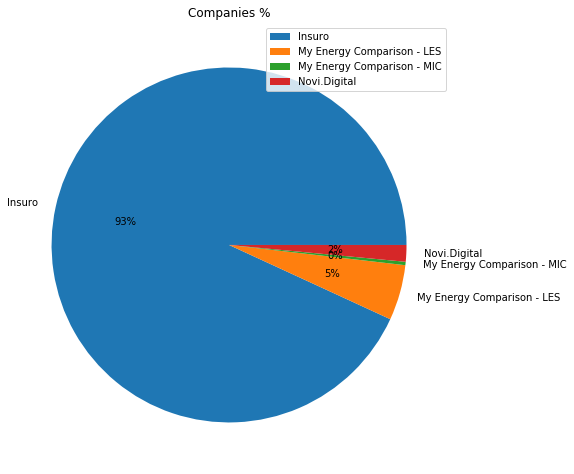

In [1417]:
# Pie graph of company
plt.figure(figsize=(8,8))
plot1=df_new.groupby('Account').size().plot(kind='pie',legend=True, autopct='%1.0f%%')
plt.title('Companies %')
plt.ylabel("")
plt.tight_layout()
plt.show();

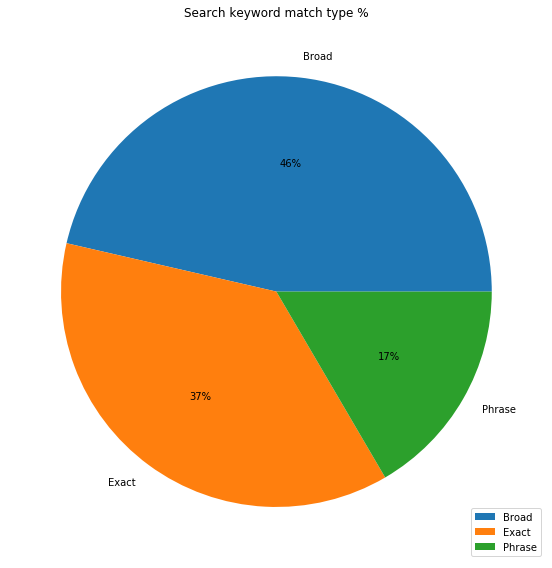

In [1418]:
# Pie graph of search keyword match type
plt.figure(figsize=(8,8))
plot1=df_new.groupby('Search keyword match type').size().plot(kind='pie',legend=True, autopct='%1.0f%%')
plt.title('Search keyword match type %')
plt.ylabel("")
plt.tight_layout()
plt.show();

<Figure size 1152x720 with 0 Axes>

Text(0, 0.5, 'Number of accounts')

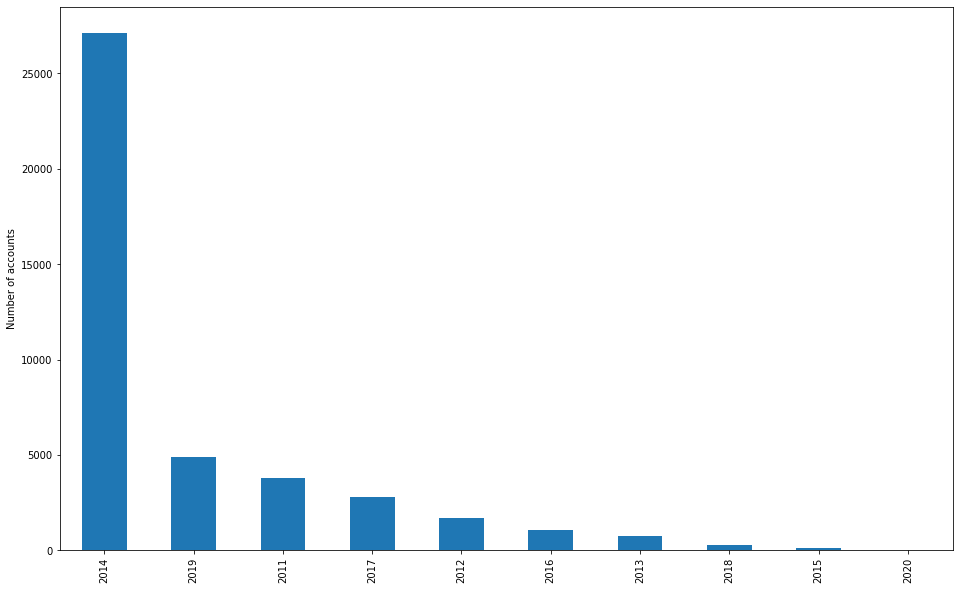

In [1419]:
#accounts created at each year
year_counts=df_new['year'].value_counts()
plt.figure(figsize=(16, 10))
year_counts.plot.bar()
plt.ylabel('Number of accounts')

In [1452]:
#check mean, median, sd of imression
df_new['Impressions'].describe()
df['Impressions'].quantile(0.98)

count    4.254400e+04
mean     1.005782e+03
std      1.225039e+04
min      1.000000e+00
25%      2.100000e+01
50%      7.000000e+01
75%      2.270000e+02
max      1.203326e+06
Name: Impressions, dtype: float64

6496.419999999998

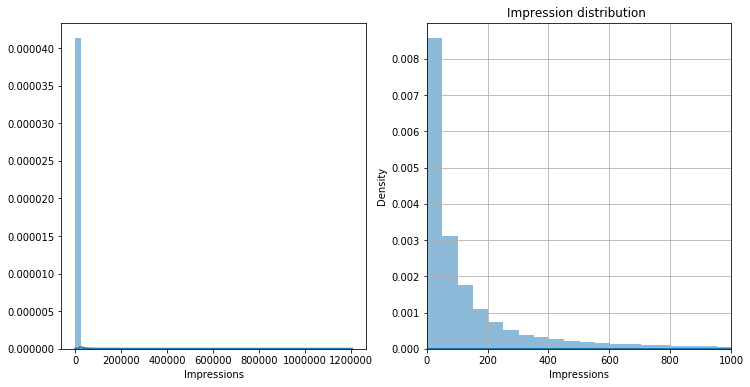

In [1421]:
#check impression distribution
# Visualise the age distribution of unique customers
fig,axes=plt.subplots(1,2)
sns.distplot(df_new['Impressions'], bins=50,hist_kws={'alpha': 0.5}, kde_kws={'linewidth':2},ax=axes[0])
sns.distplot(df_new['Impressions'], bins=24000,hist_kws={'alpha': 0.5}, kde_kws={'linewidth':2},ax=axes[1])
plt.xlim(0, 1000)
plt.grid(True)
plt.title('Impression distribution ',fontsize=12)
plt.xlabel('Impressions', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.show();

In [1448]:
#let's have a look at number of clicks
df['Clicks'].describe()
df['Clicks'].quantile(0.98)

count    42544.000000
mean        28.697349
std        281.078158
min          1.000000
25%          1.000000
50%          2.000000
75%          6.000000
max      19971.000000
Name: Clicks, dtype: float64

208.27999999999884

<Figure size 1152x720 with 0 Axes>

Text(0.5, 1.0, 'Clicks distribution ')

Text(0.5, 0, 'Clicks')

Text(0, 0.5, 'Density')

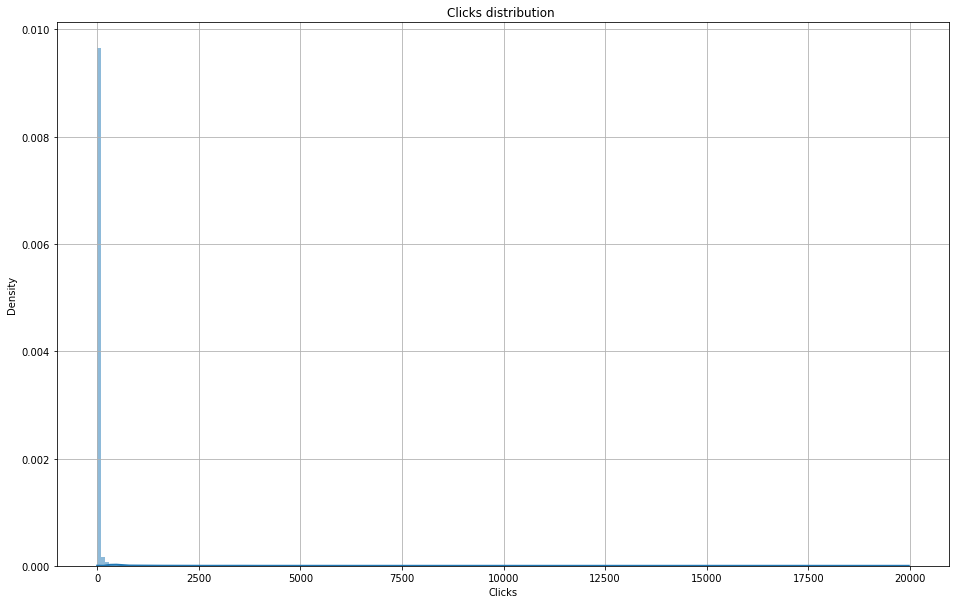

In [1423]:
plt.figure(figsize=(16, 10))
sns.distplot(df['Clicks'], bins=200,hist_kws={'alpha': 0.5}, kde_kws={'linewidth':2})
plt.grid(True)
plt.title('Clicks distribution ',fontsize=12)
plt.xlabel('Clicks', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.show()

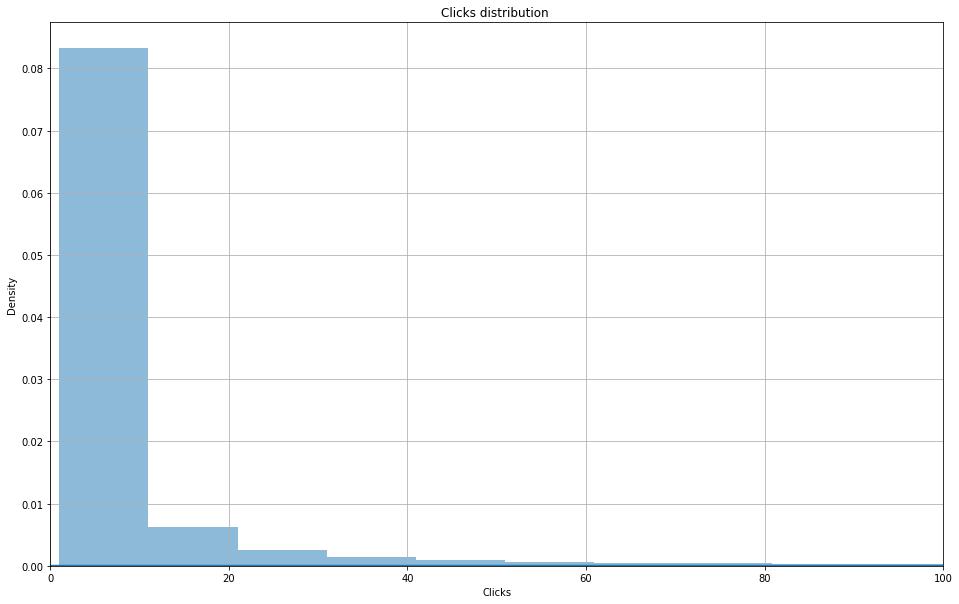

In [1424]:
plt.figure(figsize=(16, 10))
sns.distplot(df['Clicks'], bins=2000,hist_kws={'alpha': 0.5}, kde_kws={'linewidth':2})
plt.grid(True)
plt.xlim(0, 100)
plt.title('Clicks distribution ',fontsize=12)
plt.xlabel('Clicks', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.show();

<Figure size 1152x720 with 0 Axes>

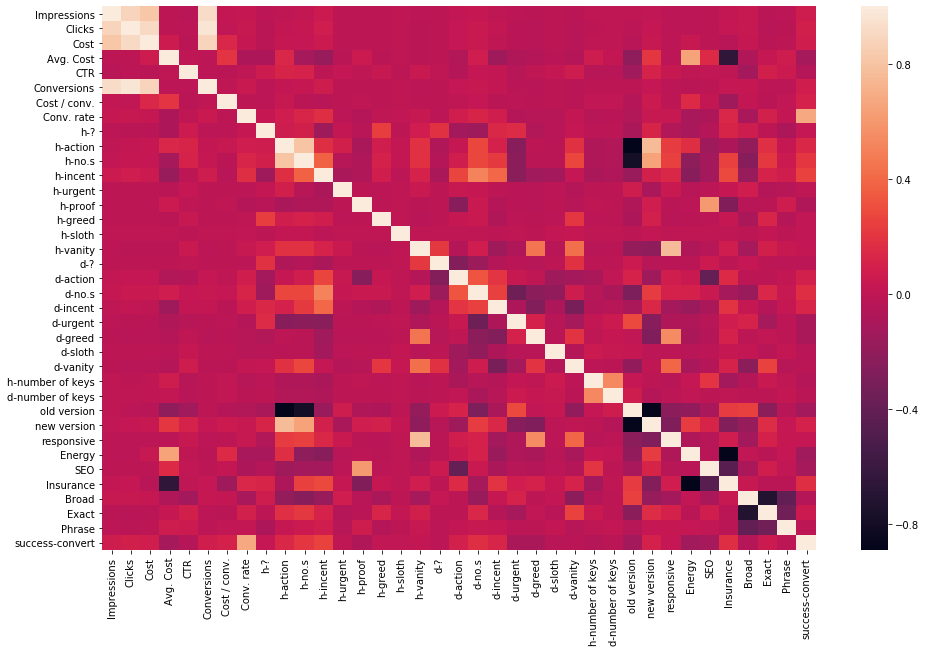

In [1425]:
import seaborn as sns
plt.figure(figsize=(16, 10))
sns.heatmap(df_new.corr())
#impression, clicks, cost, conversions are strongly positively related with each other
#h-action, h-no.s strongly related with each other
#insurance strongly negatively related with avg.cost, Energy
#SEO and insurance are quite strongly negatively related with each other
#average cost & energy, positive
#average cost& insurance, negative

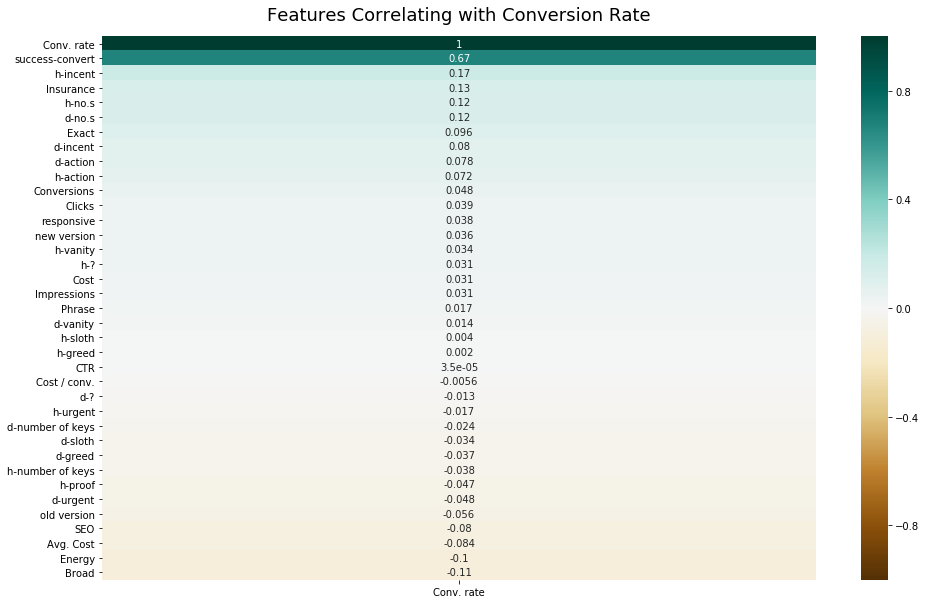

In [1426]:
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(df_new.corr()[['Conv. rate']].sort_values(by='Conv. rate', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Conversion Rate', fontdict={'fontsize':18}, pad=16);

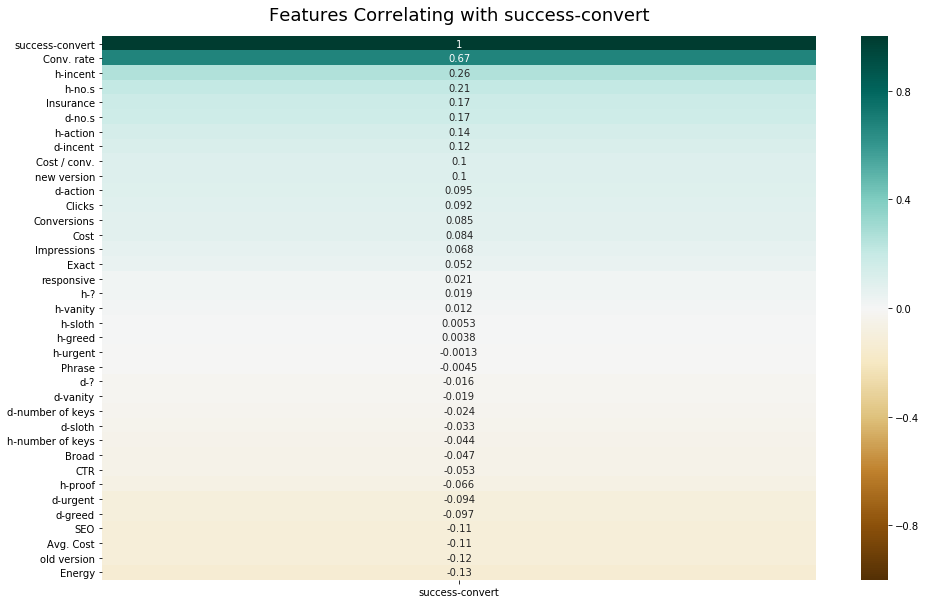

In [1427]:
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(df_new.corr()[['success-convert']].sort_values(by='success-convert', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with success-convert', fontdict={'fontsize':18}, pad=16);

<Figure size 1152x720 with 0 Axes>

Text(0, 0.5, 'Successfully Convert Rate')

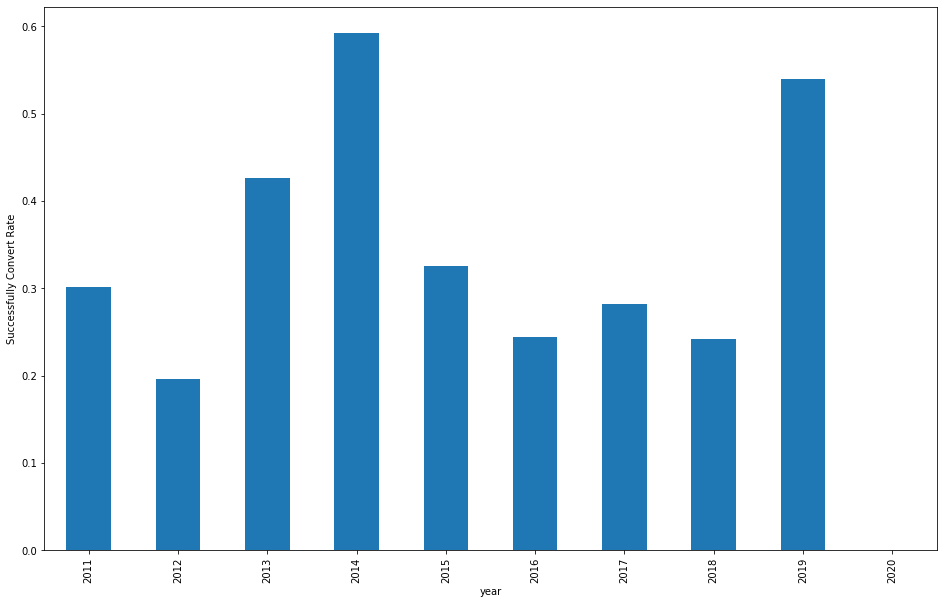

In [1428]:
#conversion & year
year_impression=df_new.groupby('year')['success-convert'].mean()
plt.figure(figsize=(16, 10))
year_impression.plot.bar()
plt.ylabel('Successfully Convert Rate')

<Figure size 864x576 with 0 Axes>

Text(0, 0.5, 'Successfully Convert Rate')

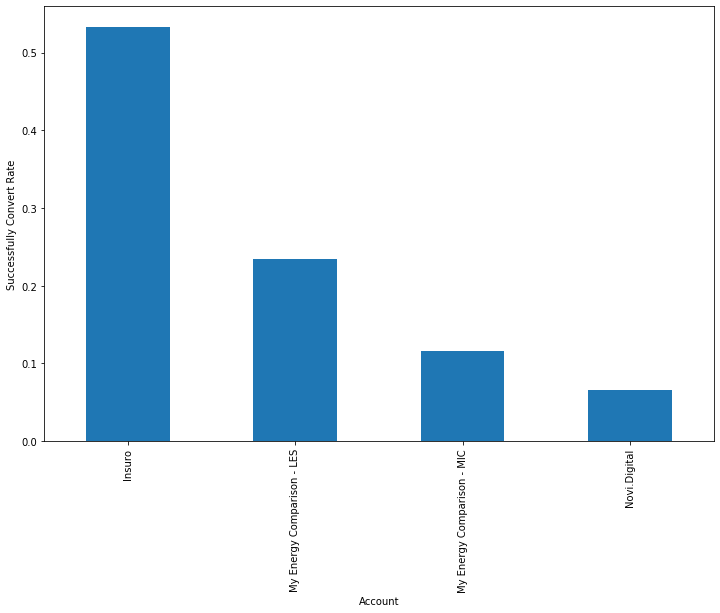

In [1429]:
#coversion & company
company_impression=df_new.groupby('Account')['success-convert'].mean()
company_impression=company_impression.sort_values(ascending=False)
plt.figure(figsize=(12, 8))
company_impression.plot.bar()
plt.ylabel('Successfully Convert Rate')

<Figure size 864x576 with 0 Axes>

Text(0, 0.5, 'Successfully Convert Rate')

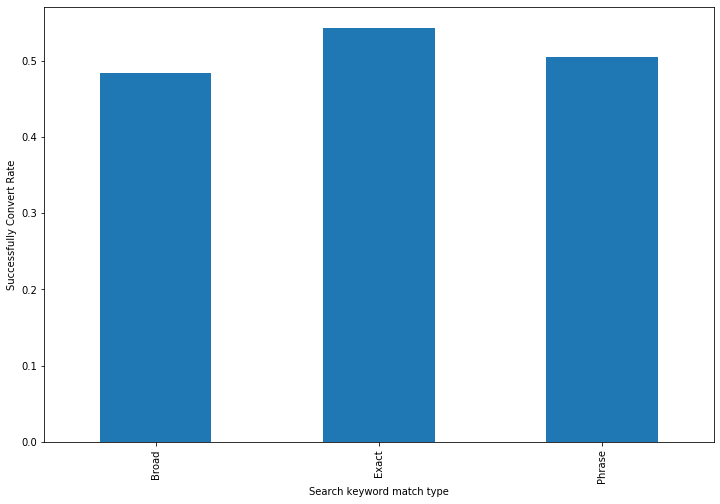

In [1430]:
#impression & search keyword type
keyword_impression=df_new.groupby('Search keyword match type')['success-convert'].mean()
keywrod_impression=keyword_impression.sort_values(ascending=False)
plt.figure(figsize=(12, 8))
keyword_impression.plot.bar()
plt.ylabel('Successfully Convert Rate')

<Figure size 864x576 with 0 Axes>

Text(0, 0.5, 'Average cost per click')

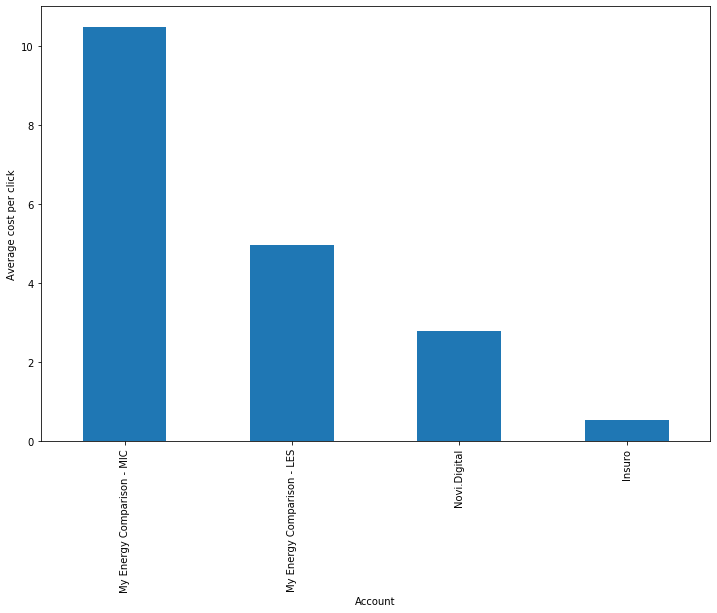

In [1431]:
#Avg.cost & company
company_avgcost=df_new.groupby('Account')['Avg. Cost'].mean()
company_avgcost=company_avgcost.sort_values(ascending=False)
plt.figure(figsize=(12, 8))
company_avgcost.plot.bar()
plt.ylabel('Average cost per click')

## Extracted text features based on NLP 

In [1432]:
dense=count_vect.mean()>0.1
dense.value_counts()
Index_label = dense[dense==True].index.tolist() 
print(Index_label)
filter_columns=count_vect[Index_label]

False    642
True      39
dtype: int64

['and', 'best', 'can', 'car', 'cheap', 'compare', 'comparing', 'could', 'customers', 'deal', 'deposit', 'from', 'half', 'in', 'insurance', 'insurers', 'insuro', 'keyword', 'less', 'money', 'no', 'of', 'on', 'our', 'over', 'providers', 'quote', 'quoted', 'quotes', 'save', 'than', 'the', 'to', 'today', 'tool', 'were', 'with', 'you', 'your']


In [1433]:
dense2=count_vect.mean()>0.5
dense2.value_counts()
Index_label2 = dense2[dense2==True].index.tolist() 
print(Index_label2)
filter_columns2=count_vect[Index_label2]

False    670
True      11
dtype: int64

['can', 'car', 'compare', 'deposit', 'from', 'insurance', 'insurers', 'no', 'over', 'quotes', 'save']


Text(0, 0.5, 'Frequency of word used in text ad')

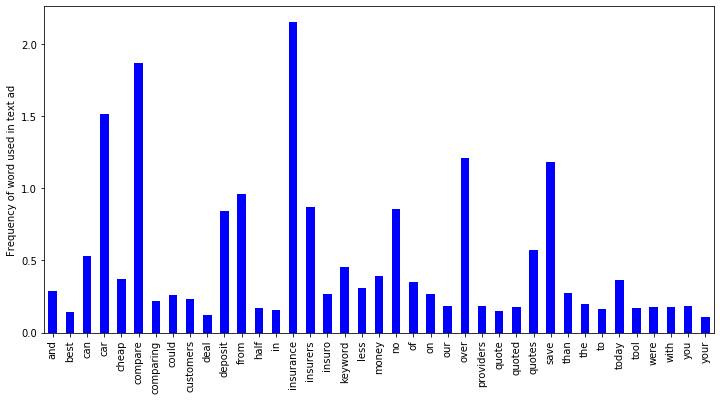

In [1434]:
#
filter_columns.mean().plot(kind='bar',color ='blue')
plt.ylabel('Frequency of word used in text ad')

In [1435]:
df_clean.describe()

,VBG,WRB,JJ,JJR,JJS,RB,RBR,RBS,VB_total,NNP_total
count,42544.000000,42544.000000,42544.000000,42544.000000,42544.000000,42544.000000,42544.0,42544.0,42544.000000,42544.000000
mean,0.021014,0.000047,0.200827,0.041533,0.025715,0.140866,0.0,0.0,1.962157,13.864047
std,0.154781,0.006856,0.482107,0.199523,0.161373,0.352519,0.0,0.0,2.101871,7.928997
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,2.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,9.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.000000,12.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,3.000000,17.000000
max,2.000000,1.000000,3.000000,1.000000,2.000000,4.000000,0.0,0.0,11.000000,60.000000


In [1436]:
#there is no RBR and RBS in our data, just remove these two column
del df_clean['RBR']
del df_clean['RBS']

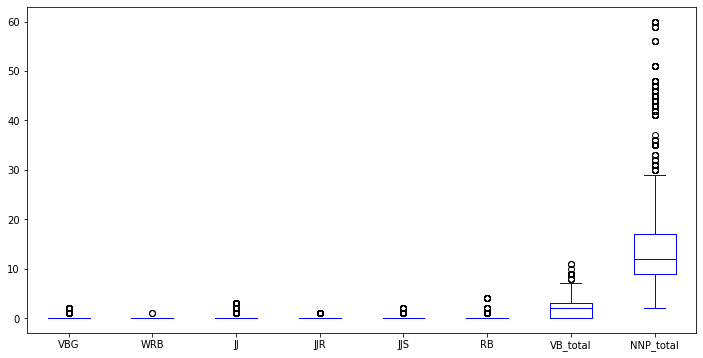

In [1437]:
df_clean.plot(kind='box',color ='blue')

# Data preparation for prediciton model

In [1438]:
#drop unuseful columns
del df_new['Path 1']
del df_new['Path 2']
del df_new['Display URL']

In [1439]:
#change categorical data to categorical
df_new['year']=df_new['year'].astype('category')
df_new['month']=df_new['month'].astype('category')
#save a copy of this verison
df_copy=df_new
#make categorical data to dummy variables
year=pd.get_dummies(df_new['year'])
month=pd.get_dummies(df_new['month'])
df_new=df_new.merge(year,left_index=True, right_index=True)
df_new=df_new.merge(month,left_index=True, right_index=True)
print (df_new.dtypes)
df_new.head()

year                         category
month                        category
Account                        object
Search keyword match type    category
Impressions                   float64
Clicks                        float64
Cost                          float64
Avg. Cost                     float64
CTR                           float64
Conversions                   float64
Cost / conv.                  float64
Conv. rate                    float64
h-?                              bool
h-action                         bool
h-no.s                           bool
h-incent                         bool
h-urgent                         bool
h-proof                          bool
h-greed                          bool
h-sloth                          bool
h-vanity                         bool
d-?                              bool
d-action                         bool
d-no.s                           bool
d-incent                         bool
d-urgent                         bool
d-greed     

,year,month,Account,Search keyword match type,Impressions,Clicks,Cost,Avg. Cost,CTR,Conversions,...,03,04,05,06,07,08,09,10,11,12
0,2019,02,My Energy Comparison - MIC,Broad,191.0,1.0,6.08,6.08,0.0052,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2019,02,My Energy Comparison - MIC,Broad,166.0,1.0,11.57,11.57,0.0060,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2019,02,My Energy Comparison - MIC,Broad,171.0,1.0,2.59,2.59,0.0058,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2019,02,My Energy Comparison - MIC,Broad,18.0,1.0,12.70,12.70,0.0556,0.0,...,0,0,0,0,0,0,0,0,0,0
4,2019,02,My Energy Comparison - MIC,Broad,241.0,2.0,17.40,8.70,0.0083,0.0,...,0,0,0,0,0,0,0,0,0,0


In [1440]:
#check the predicted variable
df_new['Conversions'].describe()
#the mean CTR in 2019:
#Insurance: 2.91%  B2B: 2.41%  consumer services: 2.41%
df_new['success-convert'] = False
df_new.loc[df_new['Conversions'] > 0, 'success-convert'] = True 
df_new.loc[df_new['Conversions'] == 0, 'success-convert'] = False 
df_new['success-convert'].value_counts()

count    42544.000000
mean        13.973060
std        162.081291
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max      15677.000000
Name: Conversions, dtype: float64

True     21673
False    20871
Name: success-convert, dtype: int64

In [1441]:
del df_new['Account']
del df_new['Search keyword match type']
del df_new['year']
del df_new['month']

# Feature Merging

When merging data, we need to remove extreme values (outliers) which are found during data exploration from the data.

## Feature data frame 1: Three types of features together 

In [1453]:
#merge three feature data together
merge_1=pd.concat([df_clean, count_vect], axis=1)
merge_2=pd.concat([df_new, merge_1], axis=1)
merge_2.head()
merge_2=merge_2.drop(['Cost'], axis=1)

,Impressions,Clicks,Cost,Avg. Cost,CTR,Conversions,Cost / conv.,Conv. rate,h-?,h-action,...,year,years,york,yorkshire,you,young,your,yourself,ys,zero
0,191.0,1.0,6.08,6.08,0.0052,0.0,0.0,0.0,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,166.0,1.0,11.57,11.57,0.0060,0.0,0.0,0.0,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,171.0,1.0,2.59,2.59,0.0058,0.0,0.0,0.0,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,18.0,1.0,12.70,12.70,0.0556,0.0,0.0,0.0,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,241.0,2.0,17.40,8.70,0.0083,0.0,0.0,0.0,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1454]:
#drop na
merge_2 = merge_2.dropna()
merge_2.isnull().sum()

Impressions         0
Clicks              0
Avg. Cost           0
CTR                 0
Conversions         0
Cost / conv.        0
Conv. rate          0
h-?                 0
h-action            0
h-no.s              0
h-incent            0
h-urgent            0
h-proof             0
h-greed             0
h-sloth             0
h-vanity            0
d-?                 0
d-action            0
d-no.s              0
d-incent            0
d-urgent            0
d-greed             0
d-sloth             0
d-vanity            0
h-number of keys    0
d-number of keys    0
old version         0
new version         0
responsive          0
Energy              0
                   ..
wanting             0
warrington          0
we                  0
we__l               0
website             0
websites            0
were                0
west                0
what                0
when                0
which               0
wide                0
will                0
winners             0
winning   

In [1455]:
#remove outliers
merge_2 = merge_2[merge_2.Impressions <= 6500]
merge_2 = merge_2[merge_2.Clicks <= 200]
merge_2['Impressions'].mean()
merge_2['Clicks'].mean()

282.55415323781926

7.919345665303469

In [1456]:
#remove those unknown variables in prediction first
feature_all=merge_2.drop(['CTR','Clicks','Impressions','Conversions','Conv. rate','Cost / conv.'],axis=1)

In [1457]:
feature_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36923 entries, 0 to 42543
Columns: 741 entries, Avg. Cost to zero
dtypes: float64(717), object(24)
memory usage: 209.0+ MB


## Feature data frame 2: Manually identified + Bag of Words

In [1459]:
#merge two feature data together
merge_a=pd.concat([df_new, count_vect], axis=1)
merge_a=merge_a.drop(['Cost'], axis=1)
#drop na
merge_a = merge_a.dropna()
#remove outliers
merge_a = merge_a[merge_a.Impressions <= 6500]
merge_a = merge_a[merge_a.Clicks <= 200]
#check
feature_MB=merge_a.drop(['CTR','Clicks','Impressions','Conversions','Conv. rate','Cost / conv.'],axis=1)
feature_MB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36923 entries, 0 to 42543
Columns: 733 entries, Avg. Cost to zero
dtypes: float64(709), object(24)
memory usage: 206.8+ MB


## Feature data frame 3: Manually identified + POS tags

In [1460]:
#
feature_MP=feature_all[['Avg. Cost','h-?','h-action','h-no.s','h-incent','h-urgent','h-proof','h-greed','h-sloth','h-vanity','d-?',
'd-action','d-no.s','d-incent','d-urgent','d-greed','d-sloth','d-vanity','h-number of keys','d-number of keys','old version','new version',
'responsive','Energy','SEO','Insurance','Broad','Exact','Phrase','success-convert','2011','2012','2013','2014','2015','2016','2017','2018',
'2019','2020','01','02','03','04','05','06','07','08','09','10','11','12','VBG','WRB','JJ','JJR','JJS','RB','VB_total', 'NNP_total']].copy()
#check
feature_MP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36923 entries, 0 to 42543
Data columns (total 60 columns):
Avg. Cost           36923 non-null float64
h-?                 36923 non-null object
h-action            36923 non-null object
h-no.s              36923 non-null object
h-incent            36923 non-null object
h-urgent            36923 non-null object
h-proof             36923 non-null object
h-greed             36923 non-null object
h-sloth             36923 non-null object
h-vanity            36923 non-null object
d-?                 36923 non-null object
d-action            36923 non-null object
d-no.s              36923 non-null object
d-incent            36923 non-null object
d-urgent            36923 non-null object
d-greed             36923 non-null object
d-sloth             36923 non-null object
d-vanity            36923 non-null object
h-number of keys    36923 non-null float64
d-number of keys    36923 non-null float64
old version         36923 non-null object
new ve

## Feature data frame 4: Manually identified features alone 

In [1508]:
#
feature_M=feature_all[['Avg. Cost','h-?','h-action','h-no.s','h-incent','h-urgent','h-proof','h-greed','h-sloth','h-vanity','d-?',
'd-action','d-no.s','d-incent','d-urgent','d-greed','d-sloth','d-vanity','h-number of keys','d-number of keys','old version','new version',
'responsive','Energy','SEO','Insurance','Broad','Exact','Phrase','success-convert','2011','2012','2013','2014','2015','2016','2017','2018',
'2019','2020','01','02','03','04','05','06','07','08','09','10','11','12']].copy()
#check
feature_M.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36923 entries, 0 to 42543
Data columns (total 52 columns):
Avg. Cost           36923 non-null float64
h-?                 36923 non-null bool
h-action            36923 non-null bool
h-no.s              36923 non-null bool
h-incent            36923 non-null bool
h-urgent            36923 non-null bool
h-proof             36923 non-null bool
h-greed             36923 non-null bool
h-sloth             36923 non-null bool
h-vanity            36923 non-null bool
d-?                 36923 non-null bool
d-action            36923 non-null bool
d-no.s              36923 non-null bool
d-incent            36923 non-null bool
d-urgent            36923 non-null bool
d-greed             36923 non-null bool
d-sloth             36923 non-null bool
d-vanity            36923 non-null bool
h-number of keys    36923 non-null float64
d-number of keys    36923 non-null float64
old version         36923 non-null bool
new version         36923 non-null bool
re

# Check multi-collinearity of each data frame

## Data frame 1: three types of features

In [1461]:
# Check for multicollinearity of the feature_all data frame
c = feature_all.corr().abs()
s = c.unstack()
corr = sorted(s.items(),key = lambda x: x[1],  reverse=True)
corr = [corr[x] for x in range(len(corr)) if corr[x][1]!=1]
corr[:20]

[(('makes', 'easier'), 0.9966414968059703),
 (('box', 'black'), 0.9884641740578148),
 (('makes', 'friendly'), 0.98794053934215),
 (('match', 'price'), 0.972932624316515),
 (('makes', 'your'), 0.9507803845003734),
 (('2019', '08'), 0.9124270687180157),
 (('business', 'energy'), 0.8917013945711557),
 (('match', 'then'), 0.8904879597397541),
 (('business', 'my'), 0.8777852637431172),
 (('convicted', 'prob'), 0.8370768876336285),
 (('makes', 'eco'), 0.8010875450254127),
 (('managed', 'projects'), 0.7637108910677922),
 (('managed', 'research'), 0.7637108910677922),
 (('minutes', 'guaranteed'), 0.739535201282346),
 (('business', 'then'), 0.7211803392482251),
 (('Avg. Cost', 'business'), 0.6909456260638884),
 (('minute', 'bit'), 0.6833639314355009),
 (('minute', 'donated'), 0.6833639314355009),
 (('minute', 'easier'), 0.6808259454420492),
 (('modified', 'cheapest'), 0.663462562647645)]

In [1462]:
# Select upper triangle of correlation matrix
corr_matrix = feature_all.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
feature_all=feature_all.drop(feature_all[to_drop], axis=1)

In [1463]:
# Check for multicollinearity again
c = feature_all.corr().abs()
s = c.unstack()
corr = sorted(s.items(),key = lambda x: x[1],  reverse=True)
corr = [corr[x] for x in range(len(corr)) if corr[x][1]!=1]
corr[:20]

[(('illness', 'critical'), 0.9467172940859001),
 (('call', 'back'), 0.9400177133704108),
 (('income', 'apply'), 0.9359703776729527),
 (('hundreds', 'designed'), 0.8703481931625217),
 (('leading', 'one'), 0.8562305198077963),
 (('by', 'supplier'), 0.7685185873725933),
 (('Avg. Cost', 'business'), 0.6909456260638884),
 (('Avg. Cost', 'energy'), 0.6362942170173367),
 (('hundred', 'comparisons'), 0.6200392507336536),
 (('Avg. Cost', 'guaranteed'), 0.6163508870492451),
 (('Avg. Cost', 'my'), 0.5939097191981894),
 (('Avg. Cost', 'review'), 0.568966791250918),
 (('Avg. Cost', 'free'), 0.5092848780362369),
 (('Avg. Cost', 'gas'), 0.5041038040302944),
 (('call', 'centre'), 0.47262952675736514),
 (('illness', 'flexible'), 0.4471473740335944),
 (('backlink', 'removal'), 0.4263494589459393),
 (('Avg. Cost', '12'), 0.41948621461433055),
 (('Avg. Cost', '2017'), 0.40327088719132936),
 (('Avg. Cost', 'for'), 0.3580746313409718)]

In [1464]:
# Remove some highly correlated varibles (test removing other as well)
feature_all=feature_all.drop(['critical','back','apply','designed','by','business','energy'],axis=1)
c = feature_all.corr().abs()
s = c.unstack()
corr = sorted(s.items(),key = lambda x: x[1],  reverse=True)
corr = [corr[x] for x in range(len(corr)) if corr[x][1]!=1]
corr[:20]

[(('check', 'visit'), 0.9364710040675607),
 (('audits', 'data'), 0.8818932135315096),
 (('com', 'myenergycomparison'), 0.8450855551036384),
 (('can', 'over'), 0.690051813158957),
 (('campervan', 'vw'), 0.6324041372586395),
 (('car', 'over'), 0.6310176548779952),
 (('can', 'car'), 0.6110267068965849),
 (('car', 'deposit'), 0.5879795485572168),
 (('an', 'pay'), 0.5003483865377634),
 (('can', 'comparing'), 0.46173407560753793),
 (('and', 'can'), 0.4470444076877537),
 (('can', 'and'), 0.4470444076877537),
 (('car', 'could'), 0.4354529366525635),
 (('Avg. Cost', '12'), 0.41948621461433055),
 (('commercial', 'guaranteed'), 0.41324798868412693),
 (('Avg. Cost', '2017'), 0.40327088719132936),
 (('can', 'compare'), 0.3949489802009713),
 (('an', 'management'), 0.37226739842237744),
 (('Avg. Cost', '01'), 0.34889653361578815),
 (('Avg. Cost', 'RB'), 0.33729099159015985)]

In [1465]:
# Remove some highly correlated varibles (test removing other as well)
feature_all=feature_all.drop(['check','data','myenergycomparison','can', 'vw','and','an'],axis=1)
c = feature_all.corr().abs()
s = c.unstack()
corr = sorted(s.items(),key = lambda x: x[1],  reverse=True)
corr = [corr[x] for x in range(len(corr)) if corr[x][1]!=1]
corr[:20]

[(('Avg. Cost', 'my'), 0.5939097191981894),
 (('in', 'eco'), 0.581094260617118),
 (('Avg. Cost', 'review'), 0.568966791250918),
 (('in', 'find'), 0.5098951000171695),
 (('insurers', 'comparing'), 0.4981259528113052),
 (('05', 'big'), 0.4767314286939686),
 (('05', 'electricity'), 0.46155714790795777),
 (('04', '2012'), 0.43851933886136457),
 (('insurers', 'deposit'), 0.4260730882802935),
 (('Avg. Cost', '12'), 0.41948621461433055),
 (('in', 'deal'), 0.40774690242384326),
 (('Avg. Cost', '2017'), 0.40327088719132936),
 (('in', 'guaranteed'), 0.3946644597320228),
 (('in', 'could'), 0.36370920001552265),
 (('insurers', 'compare'), 0.3589321204891287),
 (('in', 'electricity'), 0.35580691261931896),
 (('Avg. Cost', '01'), 0.34889653361578815),
 (('Avg. Cost', 'RB'), 0.33729099159015985),
 (('Avg. Cost', 'commercial'), 0.31274735953947796),
 (('Avg. Cost', 'electricity'), 0.3123588495791917)]

In [1466]:
#change data type to float/bool for using in classification models
feature_all=feature_all.infer_objects()
feature_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36923 entries, 0 to 42543
Columns: 599 entries, Avg. Cost to zero
dtypes: bool(24), float64(575)
memory usage: 163.1 MB


## Data frame 2: Manually identified features + BoW features

In [1467]:
# Check for multicollinearity of the feature_MB data frame
c = feature_MB.corr().abs()
s = c.unstack()
corr = sorted(s.items(),key = lambda x: x[1],  reverse=True)
corr = [corr[x] for x in range(len(corr)) if corr[x][1]!=1]
corr[:20]

[(('achieved', 'have'), 0.9990547389618777),
 (('donated', 'easier'), 0.9966414968059703),
 (('charity', 'bit'), 0.98794053934215),
 (('donated', 'charity'), 0.98794053934215),
 (('different', 'pub'), 0.9799515658331397),
 (('achieved', 'clients'), 0.9433401031294916),
 (('achieved', 'award'), 0.937092823509731),
 (('audits', 'data'), 0.8818932135315096),
 (('2020', 'an'), 0.8818454040837119),
 (('do', 'drivers'), 0.8587035730428465),
 (('drivers', 'do'), 0.8587035730428465),
 (('chaucer', 'direct'), 0.8547711189328329),
 (('costs', 'cut'), 0.8508722896964388),
 (('available', 'coverage'), 0.8263690329570657),
 (('available', 'decreasing'), 0.8263690329570657),
 (('available', 'level'), 0.8263690329570657),
 (('decreasing', 'available'), 0.8263690329570657),
 (('donated', 'eco'), 0.8010875450254127),
 (('drivers', 'new'), 0.7920992950744906),
 (('audits', 'managed'), 0.7637108910677922)]

In [1468]:
# Select upper triangle of correlation matrix
corr_matrix = feature_MB.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
feature_MB=feature_MB.drop(feature_MB[to_drop], axis=1)

In [1469]:
# Check for multicollinearity again
c = feature_MB.corr().abs()
s = c.unstack()
corr = sorted(s.items(),key = lambda x: x[1],  reverse=True)
corr = [corr[x] for x in range(len(corr)) if corr[x][1]!=1]
corr[:20]

[(('income', 'apply'), 0.9359703776729527),
 (('apply', 'protect'), 0.8058289321704042),
 (('apply', 'protection'), 0.7769518269495006),
 (('cover', 'horse'), 0.7091858655368648),
 (('Avg. Cost', 'business'), 0.6909456260638884),
 (('hundreds', 'reliable'), 0.6453573095035251),
 (('Avg. Cost', 'energy'), 0.6362942170173367),
 (('Avg. Cost', 'review'), 0.568966791250918),
 (('d-number of keys', 'h-number of keys'), 0.5195886034615085),
 (('hundreds', 'make'), 0.5182618068971165),
 (('covered', 'easy'), 0.4383819933448231),
 (('Avg. Cost', '12'), 0.41948621461433055),
 (('Avg. Cost', '2017'), 0.40327088719132936),
 (('achieving', 'consultancy'), 0.3684406571453376),
 (('Avg. Cost', '01'), 0.34889653361578815),
 (('buy', 'low'), 0.3474234334683686),
 (('apply', 'online'), 0.2974066425709032),
 (('Avg. Cost', 'average'), 0.2916249216946598),
 (('Avg. Cost', 'renewable'), 0.2858473177327077),
 (('classic', 'get'), 0.2688054884557252)]

In [1470]:
# Remove some highly correlated varibles (test removing other as well)
feature_MB=feature_MB.drop(['apply','business','energy'],axis=1)
c = feature_MB.corr().abs()
s = c.unstack()
corr = sorted(s.items(),key = lambda x: x[1],  reverse=True)
corr = [corr[x] for x in range(len(corr)) if corr[x][1]!=1]
corr[:20]

[(('best', 'deal'), 0.9145301310540289),
 (('push', 'road'), 0.8676609612785043),
 (('comparing', 'half'), 0.8611497199408499),
 (('prob', 'convicted'), 0.8370768876336285),
 (('bikes', 'here'), 0.8236540179501909),
 (('comparison', 'site'), 0.7837954244948031),
 (('bikes', 'other'), 0.7827540669245339),
 (('right', 'at'), 0.7805167280880632),
 (('confidential', 'secure'), 0.6913391454375972),
 (('content', 'different'), 0.6153201163479723),
 (('by', 'bills'), 0.590521491506013),
 (('comparisons', 'rapid'), 0.5882129138029095),
 (('consultancy', 'provide'), 0.5772720702924914),
 (('best', 'bit'), 0.5446294154302612),
 (('award', 'ppc'), 0.5426619728310013),
 (('review', 'prices'), 0.5413499310441814),
 (('prob', 'driver'), 0.5360231864792215),
 (('comparison', 'insuro'), 0.5336097863868073),
 (('bike', 'leading'), 0.5289980559257622),
 (('b2b', 'consultancy'), 0.516320843515784)]

In [1471]:
# Remove some highly correlated varibles (test removing other as well)
feature_MB=feature_MB.drop(['deal','road','comparing','site','other','at'],axis=1)
c = feature_MB.corr().abs()
s = c.unstack()
corr = sorted(s.items(),key = lambda x: x[1],  reverse=True)
corr = [corr[x] for x in range(len(corr)) if corr[x][1]!=1]
corr[:20]

[(('drivers', 'are'), 0.926703294018519),
 (('damages', 'against'), 0.912858565597366),
 (('data', 'audits'), 0.8818932135315096),
 (('drivers', 'do'), 0.8587035730428465),
 (('available', 'coverage'), 0.8263690329570657),
 (('drivers', 'new'), 0.7920992950744906),
 (('coverage', 'people'), 0.755898232389897),
 (('accidents', 'yourself'), 0.7474885507771704),
 (('could', 'bit'), 0.7103408237341151),
 (('Avg. Cost', 'then'), 0.6989280599806684),
 (('compare', 'save'), 0.6891880123685956),
 (('Broad', 'Exact'), 0.6851758718601978),
 (('2016', '12'), 0.6257051864645734),
 (('available', 'people'), 0.624650891313632),
 (('compares', 'health'), 0.6070072551771606),
 (('coverage', 'joint'), 0.6068939008045562),
 (('drivers', 'driver'), 0.6019200048694392),
 (('Avg. Cost', 'review'), 0.568966791250918),
 (('convicted', 'driver'), 0.5504394046917431),
 (('available', 'flexible'), 0.5409562141658756)]

In [1472]:
# Remove some highly correlated varibles (test removing other as well)
feature_MB=feature_MB.drop(['are','against','data','do','available','drivers','people','then'],axis=1)
c = feature_MB.corr().abs()
s = c.unstack()
corr = sorted(s.items(),key = lambda x: x[1],  reverse=True)
corr = [corr[x] for x in range(len(corr)) if corr[x][1]!=1]
corr[:20]

[(('income', 'protection'), 0.9488586162194808),
 (('instant', 'quick'), 0.948007996583988),
 (('effective', 'rest'), 0.9458796724571905),
 (('08', '2019'), 0.9124270687180157),
 (('07', '2014'), 0.891149481686403),
 (('easy', 'use'), 0.8675700675183362),
 (('effective', 'complete'), 0.8596753159105248),
 (('companies', 'let'), 0.729487670616011),
 (('insure', 'new'), 0.7258777127261622),
 (('cover', 'horse'), 0.7091858655368648),
 (('effective', 'is'), 0.6870166781365808),
 (('eco', 'save'), 0.6797366168641993),
 (('easy', 'matter'), 0.6662598952412274),
 (('local', 'audits'), 0.6416020299962282),
 (('comp', 'comprehensive'), 0.6324298365608153),
 (('Avg. Cost', 'guaranteed'), 0.6163508870492451),
 (('comparisons', 'rapid'), 0.5882129138029095),
 (('convicted', 'driver'), 0.5504394046917431),
 (('05', 'rates'), 0.5486772685452592),
 (('07', '08'), 0.5202843355389851)]

In [1474]:
# Remove some highly correlated varibles (test removing other as well)
feature_MB=feature_MB.drop(['protection','instant','rest','08','2014','use','complete','let','is','matter'],axis=1)
c = feature_MB.corr().abs()
s = c.unstack()
corr = sorted(s.items(),key = lambda x: x[1],  reverse=True)
corr = [corr[x] for x in range(len(corr)) if corr[x][1]!=1]
corr[:20]

[(('award', 'achieved'), 0.937092823509731),
 (('best', 'the'), 0.8924787081450616),
 (('2020', 'an'), 0.8818454040837119),
 (('property', 'damage'), 0.7712118670536302),
 (('award', 'agency'), 0.7259829049704752),
 (('review', 'guaranteed'), 0.7092455494439275),
 (('confidential', 'secure'), 0.6913391454375972),
 (('review', 'electricity'), 0.6785840787987052),
 (('comparison', 'eco'), 0.6267320843720233),
 (('comparison', 'of'), 0.6224018544594135),
 (('Avg. Cost', 'guaranteed'), 0.6163508870492451),
 (('comparison', 'save'), 0.6139049448486352),
 (('review', '2017'), 0.6075321936666078),
 (('best', 'bit'), 0.5446294154302612),
 (('prices', 'review'), 0.5413499310441814),
 (('consultancy', 'b2b'), 0.516320843515784),
 (('confidential', 'retrieve'), 0.5059247171228501),
 (('comparison', 'minute'), 0.49588798165941456),
 (('quotes', 'bit'), 0.4942175765473317),
 (('comparison', 'my'), 0.4758861388075533)]

In [1475]:
# Remove some highly correlated varibles (test removing other as well)
feature_MB=feature_MB.drop(['achieved','the','an','property','agency','review','secure','review','of'],axis=1)
c = feature_MB.corr().abs()
s = c.unstack()
corr = sorted(s.items(),key = lambda x: x[1],  reverse=True)
corr = [corr[x] for x in range(len(corr)) if corr[x][1]!=1]
corr[:20]

[(('audits', 'managed'), 0.7637108910677922),
 (('based', 'centre'), 0.7499288853988224),
 (('Avg. Cost', 'guaranteed'), 0.6163508870492451),
 (('h-number of keys', 'd-number of keys'), 0.5195886034615085),
 (('backlink', 'removal'), 0.4263494589459393),
 (('Avg. Cost', '12'), 0.41948621461433055),
 (('Avg. Cost', '2017'), 0.40327088719132936),
 (('auto', 'policies'), 0.3799076593603023),
 (('based', 'call'), 0.35411228704932873),
 (('Avg. Cost', '01'), 0.34889653361578815),
 (('auto', 'leading'), 0.3392083074867298),
 (('audits', 'company'), 0.3304735903649131),
 (('Avg. Cost', 'electricity'), 0.3123588495791917),
 (('Avg. Cost', 'average'), 0.2916249216946598),
 (('co', 'salon'), 0.2773154340012036),
 (('Avg. Cost', '2016'), 0.24611317889782333),
 (('chip', 'shop'), 0.21910858787700954),
 (('Avg. Cost', 'car'), 0.2174258334219785),
 (('h-number of keys', 'award'), 0.21173889802077822),
 (('indemnity', 'now'), 0.19204885120881982)]

In [1476]:
# Remove some highly correlated varibles (test removing other as well)
feature_MB=feature_MB.drop(['managed','based'],axis=1)
c = feature_MB.corr().abs()
s = c.unstack()
corr = sorted(s.items(),key = lambda x: x[1],  reverse=True)
corr = [corr[x] for x in range(len(corr)) if corr[x][1]!=1]
corr[:20]

[(('comp', 'fully'), 0.9438728347267926),
 (('com', 'myenergycomparison'), 0.8450855551036384),
 (('comp', 'comprehensive'), 0.6324298365608153),
 (('Avg. Cost', 'guaranteed'), 0.6163508870492451),
 (('insuro', 'eco'), 0.5392988400687517),
 (('Avg. Cost', 'free'), 0.5092848780362369),
 (('Avg. Cost', 'gas'), 0.5041038040302944),
 (('insuro', 'find'), 0.4576271980868969),
 (('monthly', 'try'), 0.42987079000326645),
 (('Avg. Cost', '12'), 0.41948621461433055),
 (('Avg. Cost', '2017'), 0.40327088719132936),
 (('looking', 'check'), 0.398706591205543),
 (('keyword', 'from'), 0.3761977869367759),
 (('it', 'different'), 0.3692429750594755),
 (('keyword', 'and'), 0.3589342847872798),
 (('Avg. Cost', 'for'), 0.3580746313409718),
 (('Avg. Cost', '01'), 0.34889653361578815),
 (('2020', 'management'), 0.3279555815437122),
 (('Avg. Cost', 'commercial'), 0.31274735953947796),
 (('commercial', 'Avg. Cost'), 0.31274735953947796)]

In [1477]:
# Remove some highly correlated varibles (test removing other as well)
feature_MB=feature_MB.drop(['comp','myenergycomparison'],axis=1)
c = feature_MB.corr().abs()
s = c.unstack()
corr = sorted(s.items(),key = lambda x: x[1],  reverse=True)
corr = [corr[x] for x in range(len(corr)) if corr[x][1]!=1]
corr[:20]

[(('Avg. Cost', 'free'), 0.5092848780362369),
 (('Avg. Cost', '12'), 0.41948621461433055),
 (('Avg. Cost', '2017'), 0.40327088719132936),
 (('Avg. Cost', '01'), 0.34889653361578815),
 (('Avg. Cost', 'electricity'), 0.3123588495791917),
 (('Avg. Cost', 'average'), 0.2916249216946598),
 (('Avg. Cost', '2016'), 0.24611317889782333),
 (('Avg. Cost', 'call'), 0.19125650674347455),
 (('Avg. Cost', 'back'), 0.18407483962850624),
 (('Avg. Cost', 'award'), 0.14760034048063922),
 (('Avg. Cost', '07'), 0.14728113570112192),
 (('h-number of keys', 'digital'), 0.13217117488222307),
 (('h-number of keys', 'marketing'), 0.12034313120836489),
 (('Avg. Cost', '02'), 0.11686389646344876),
 (('Avg. Cost', 'bills'), 0.11268606458419292),
 (('Avg. Cost', '2011'), 0.10529459889493527),
 (('h-number of keys', 'ecommerce'), 0.10122131526485634),
 (('Avg. Cost', '10'), 0.08734506448244199),
 (('Avg. Cost', 'and'), 0.08695383363231084),
 (('Avg. Cost', 'efficiency'), 0.08627118986583562)]

In [1484]:
#change data type to float/bool for using in classification models
feature_MB=feature_MB.infer_objects()
feature_MB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36923 entries, 0 to 42543
Columns: 566 entries, Avg. Cost to zero
dtypes: bool(24), float64(542)
memory usage: 153.8 MB


## Data frame 3: Manually identified features + POS Tag features

In [1478]:
# Check for multicollinearity of the feature_MB data frame
c = feature_MP.corr().abs()
s = c.unstack()
corr = sorted(s.items(),key = lambda x: x[1],  reverse=True)
corr = [corr[x] for x in range(len(corr)) if corr[x][1]!=1]
corr[:20]

[(('2019', '08'), 0.9124270687180157),
 (('08', '2019'), 0.9124270687180157),
 (('2014', '07'), 0.891149481686403),
 (('07', '2014'), 0.891149481686403),
 (('2013', '06'), 0.8752147037640339),
 (('06', '2013'), 0.8752147037640339),
 (('2011', '10'), 0.745585709518157),
 (('10', '2011'), 0.745585709518157),
 (('Broad', 'Exact'), 0.6851758718601978),
 (('Exact', 'Broad'), 0.6851758718601978),
 (('2017', '01'), 0.6779626811464468),
 (('01', '2017'), 0.6779626811464468),
 (('2016', '12'), 0.6257051864645734),
 (('12', '2016'), 0.6257051864645734),
 (('2017', 'JJR'), 0.5845522142708065),
 (('JJR', '2017'), 0.5845522142708065),
 (('2019', 'NNP_total'), 0.5844592674477685),
 (('NNP_total', '2019'), 0.5844592674477685),
 (('VB_total', 'NNP_total'), 0.5801268142260216),
 (('NNP_total', 'VB_total'), 0.5801268142260216)]

In [1481]:
# Select upper triangle of correlation matrix
corr_matrix = feature_MP.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
feature_MP=feature_MP.drop(feature_MP[to_drop], axis=1)

In [1482]:
# Remove some highly correlated varibles (test removing other as well)
c = feature_MP.corr().abs()
s = c.unstack()
corr = sorted(s.items(),key = lambda x: x[1],  reverse=True)
corr = [corr[x] for x in range(len(corr)) if corr[x][1]!=1]
corr[:20]

[(('2014', '07'), 0.891149481686403),
 (('07', '2014'), 0.891149481686403),
 (('2013', '06'), 0.8752147037640339),
 (('06', '2013'), 0.8752147037640339),
 (('2011', '10'), 0.745585709518157),
 (('10', '2011'), 0.745585709518157),
 (('Broad', 'Exact'), 0.6851758718601978),
 (('Exact', 'Broad'), 0.6851758718601978),
 (('2017', '01'), 0.6779626811464468),
 (('01', '2017'), 0.6779626811464468),
 (('2016', '12'), 0.6257051864645734),
 (('12', '2016'), 0.6257051864645734),
 (('2017', 'JJR'), 0.5845522142708065),
 (('JJR', '2017'), 0.5845522142708065),
 (('2019', 'NNP_total'), 0.5844592674477685),
 (('NNP_total', '2019'), 0.5844592674477685),
 (('VB_total', 'NNP_total'), 0.5801268142260216),
 (('NNP_total', 'VB_total'), 0.5801268142260216),
 (('h-number of keys', 'd-number of keys'), 0.5195886034615085),
 (('d-number of keys', 'h-number of keys'), 0.5195886034615085)]

In [1483]:
# Remove some highly correlated varibles (test removing other as well)
feature_MP=feature_MP.drop(['07','2011','06','Exact','01','12'],axis=1)
c = feature_MP.corr().abs()
s = c.unstack()
corr = sorted(s.items(),key = lambda x: x[1],  reverse=True)
corr = [corr[x] for x in range(len(corr)) if corr[x][1]!=1]
corr[:20]

[(('2017', 'JJR'), 0.5845522142708065),
 (('JJR', '2017'), 0.5845522142708065),
 (('2019', 'NNP_total'), 0.5844592674477685),
 (('NNP_total', '2019'), 0.5844592674477685),
 (('VB_total', 'NNP_total'), 0.5801268142260216),
 (('NNP_total', 'VB_total'), 0.5801268142260216),
 (('h-number of keys', 'd-number of keys'), 0.5195886034615085),
 (('d-number of keys', 'h-number of keys'), 0.5195886034615085),
 (('JJ', 'JJS'), 0.4762236129052589),
 (('JJS', 'JJ'), 0.4762236129052589),
 (('JJ', 'JJR'), 0.47533401347408116),
 (('JJR', 'JJ'), 0.47533401347408116),
 (('2014', '2019'), 0.46772153888381085),
 (('2019', '2014'), 0.46772153888381085),
 (('Broad', 'Phrase'), 0.4423006336023302),
 (('Phrase', 'Broad'), 0.4423006336023302),
 (('2012', '04'), 0.43851933886136457),
 (('04', '2012'), 0.43851933886136457),
 (('2015', '02'), 0.41299680200865824),
 (('02', '2015'), 0.41299680200865824)]

In [1485]:
#change data type to float/bool for using in classification models
feature_MP=feature_MP.infer_objects()
feature_MP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36923 entries, 0 to 42543
Data columns (total 53 columns):
Avg. Cost           36923 non-null float64
h-?                 36923 non-null bool
h-action            36923 non-null bool
h-no.s              36923 non-null bool
h-incent            36923 non-null bool
h-urgent            36923 non-null bool
h-proof             36923 non-null bool
h-greed             36923 non-null bool
h-sloth             36923 non-null bool
h-vanity            36923 non-null bool
d-?                 36923 non-null bool
d-action            36923 non-null bool
d-no.s              36923 non-null bool
d-incent            36923 non-null bool
d-urgent            36923 non-null bool
d-greed             36923 non-null bool
d-sloth             36923 non-null bool
d-vanity            36923 non-null bool
h-number of keys    36923 non-null float64
d-number of keys    36923 non-null float64
old version         36923 non-null bool
new version         36923 non-null bool
re

## Data frame 4: Manually identified features alone

In [1591]:
# Check for multicollinearity of the feature_MB data frame
c = feature_M.corr().abs()
s = c.unstack()
corr = sorted(s.items(),key = lambda x: x[1],  reverse=True)
corr = [corr[x] for x in range(len(corr)) if corr[x][1]!=1]
corr[:20]

[(('2019', '08'), 0.9124270687180157),
 (('08', '2019'), 0.9124270687180157),
 (('2014', '07'), 0.891149481686403),
 (('07', '2014'), 0.891149481686403),
 (('h-action', 'old version'), 0.8852705608653788),
 (('old version', 'h-action'), 0.8852705608653788),
 (('2013', '06'), 0.8752147037640339),
 (('06', '2013'), 0.8752147037640339),
 (('Energy', 'Insurance'), 0.8743492537367911),
 (('Insurance', 'Energy'), 0.8743492537367911),
 (('old version', 'new version'), 0.863871635299976),
 (('new version', 'old version'), 0.863871635299976),
 (('h-action', 'h-no.s'), 0.7902710667981296),
 (('h-no.s', 'h-action'), 0.7902710667981296),
 (('Insurance', '2017'), 0.7834129467923457),
 (('2017', 'Insurance'), 0.7834129467923457),
 (('h-vanity', 'responsive'), 0.7695632924881451),
 (('responsive', 'h-vanity'), 0.7695632924881451),
 (('h-no.s', 'old version'), 0.7689928023204391),
 (('old version', 'h-no.s'), 0.7689928023204391)]

In [1592]:
# Select upper triangle of correlation matrix
corr_matrix = feature_M.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
feature_M=feature_M.drop(feature_M[to_drop], axis=1)

In [1593]:
# Remove some highly correlated varibles (test removing other as well)
c = feature_M.corr().abs()
s = c.unstack()
corr = sorted(s.items(),key = lambda x: x[1],  reverse=True)
corr = [corr[x] for x in range(len(corr)) if corr[x][1]!=1]
corr[:20]

[(('2014', '07'), 0.891149481686403),
 (('07', '2014'), 0.891149481686403),
 (('h-action', 'old version'), 0.8852705608653788),
 (('old version', 'h-action'), 0.8852705608653788),
 (('2013', '06'), 0.8752147037640339),
 (('06', '2013'), 0.8752147037640339),
 (('Energy', 'Insurance'), 0.8743492537367911),
 (('Insurance', 'Energy'), 0.8743492537367911),
 (('old version', 'new version'), 0.863871635299976),
 (('new version', 'old version'), 0.863871635299976),
 (('h-action', 'h-no.s'), 0.7902710667981296),
 (('h-no.s', 'h-action'), 0.7902710667981296),
 (('Insurance', '2017'), 0.7834129467923457),
 (('2017', 'Insurance'), 0.7834129467923457),
 (('h-vanity', 'responsive'), 0.7695632924881451),
 (('responsive', 'h-vanity'), 0.7695632924881451),
 (('h-no.s', 'old version'), 0.7689928023204391),
 (('old version', 'h-no.s'), 0.7689928023204391),
 (('h-action', 'new version'), 0.7483093624097882),
 (('new version', 'h-action'), 0.7483093624097882)]

In [1594]:
# Remove some highly correlated varibles (test removing other as well)
feature_M=feature_M.drop(['07','2011','06','old version','Insurance','Exact','h-no.s'],axis=1)
c = feature_M.corr().abs()
s = c.unstack()
corr = sorted(s.items(),key = lambda x: x[1],  reverse=True)
corr = [corr[x] for x in range(len(corr)) if corr[x][1]!=1]
corr[:20]

[(('h-vanity', 'responsive'), 0.7695632924881451),
 (('responsive', 'h-vanity'), 0.7695632924881451),
 (('h-action', 'new version'), 0.7483093624097882),
 (('new version', 'h-action'), 0.7483093624097882),
 (('2017', '01'), 0.6779626811464468),
 (('01', '2017'), 0.6779626811464468),
 (('Avg. Cost', 'Energy'), 0.6452137586703314),
 (('Energy', 'Avg. Cost'), 0.6452137586703314),
 (('d-sloth', '2016'), 0.6445780817513278),
 (('2016', 'd-sloth'), 0.6445780817513278),
 (('Energy', '2017'), 0.6401938984801644),
 (('2017', 'Energy'), 0.6401938984801644),
 (('2016', '12'), 0.6257051864645734),
 (('12', '2016'), 0.6257051864645734),
 (('h-proof', 'SEO'), 0.6034155480879264),
 (('SEO', 'h-proof'), 0.6034155480879264),
 (('h-proof', '11'), 0.6022909871367881),
 (('11', 'h-proof'), 0.6022909871367881),
 (('d-greed', 'responsive'), 0.5405375920473683),
 (('responsive', 'd-greed'), 0.5405375920473683)]

In [1595]:
#change data type to float/bool for using in classification models
feature_M=feature_M.infer_objects()
feature_M.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36923 entries, 0 to 42543
Data columns (total 44 columns):
Avg. Cost           36923 non-null float64
h-?                 36923 non-null bool
h-action            36923 non-null bool
h-incent            36923 non-null bool
h-urgent            36923 non-null bool
h-proof             36923 non-null bool
h-greed             36923 non-null bool
h-sloth             36923 non-null bool
h-vanity            36923 non-null bool
d-?                 36923 non-null bool
d-action            36923 non-null bool
d-no.s              36923 non-null bool
d-incent            36923 non-null bool
d-urgent            36923 non-null bool
d-greed             36923 non-null bool
d-sloth             36923 non-null bool
d-vanity            36923 non-null bool
h-number of keys    36923 non-null float64
d-number of keys    36923 non-null float64
new version         36923 non-null bool
responsive          36923 non-null bool
Energy              36923 non-null bool
SE

## Class Balance 

Before we move to algorithm selection, we need to check the class balance of the predicted variable. 

In [1487]:
#check class balance
feature_all['success-convert'].value_counts()

False    18991
True     17932
Name: success-convert, dtype: int64

The class balance of the predicted variable is closed to 106:100, which looks fine. Therefore we do not need to resample data in this case.

# Evaluate Algorithm

**Model Selection**

There are number of classification models available to us via the **`scikit-learn`** package, and we can rapidly experiment using each of them to find the optimal model.

Below is an outline of the steps we will take to arrive at the best model:

*	Split data into training and validation (hold-out) set
*	Use cross-validation to fit different models to training set
*	Select model with the highest cross-validation score as model of choice
*	Tune hyper parameters of chosen model.
*	Test the model on hold-out set

## Feature Selection experiment: Three types of feature together 

In [1489]:
# Split into train and validation set
from sklearn.model_selection import train_test_split

train, test = train_test_split(feature_all, test_size=0.2, random_state=15,stratify=feature_all['success-convert'])

train['success-convert'].value_counts()
test['success-convert'].value_counts()

False    15193
True     14345
Name: success-convert, dtype: int64

False    3798
True     3587
Name: success-convert, dtype: int64

In [1490]:
# create a dataframe with only features
train_x=train.drop(columns=['success-convert'])
test_x=test.drop(columns=['success-convert'])

In [1517]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics

# Create instance (i.e. object) of LogisticRegression
clf_log = LogisticRegression(random_state=15)
# Fit the model using the training data
logistic_model = clf_log.fit(train_x, train['success-convert'])

# Compute the accuracy scores of different folds in training data
scores_log = cross_val_score(clf_log, train_x, train['success-convert'], cv=5)
scores_log.mean()
log=scores_log.mean()
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores_log.mean(), scores_log.std() * 2))

/Users/xcding/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/xcding/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/xcding/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/xcding/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/xcding/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

0.6462525727425513

In [1518]:
from sklearn.tree import DecisionTreeClassifier

# The decision tree classifier.
clf_tree = DecisionTreeClassifier(random_state=15)
# Training the Decision Tree
tree_model = clf_tree.fit(train_x, train['success-convert'])

# Compute the accuracy scores of different folds in training data
scores_tree = cross_val_score(clf_tree, train_x, train['success-convert'], cv=5)
scores_tree.mean()
tree=scores_tree.mean()
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores_tree.mean(), scores_tree.std() * 2))

# list(zip(test_x, tree_model.feature_importances_))

0.605830201112046

In [1519]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

clf_RF = RandomForestClassifier(random_state=15)

RF_model = clf_RF.fit(train_x, train['success-convert'])

# Compute the accuracy scores of different folds in training data
scores_RF = cross_val_score(clf_RF, train_x, train['success-convert'], cv=5)
scores_RF.mean()
rf=scores_RF.mean()
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores_RF.mean(), scores_RF.std() * 2))

/Users/xcding/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.6232987863452001

In [1520]:
from sklearn import svm

clf_svc = svm.SVC(probability=True,random_state=15)
SVC_model = clf_svm.fit(train_x, train['success-convert'])

# Compute the accuracy scores of different folds in training data
scores_SVC = cross_val_score(clf_svc, train_x, train['success-convert'], cv=5)
scores_SVC.mean()
svc=scores_SVC.mean()
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores_SVM.mean(), scores_SVM.std() * 2))

/Users/xcding/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/xcding/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/xcding/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/xcding/anaconda3/lib/python3.7/site-packages/

0.6505519769929735

In [1523]:
from sklearn.ensemble import GradientBoostingClassifier

clf_gradient = GradientBoostingClassifier(random_state=15).fit(train_x, train['success-convert'])

# Compute the accuracy scores of different folds in training data
scores_gradient = cross_val_score(clf_gradient, train_x, train['success-convert'], cv=5)
scores_gradient.mean()
gb=scores_gradient.mean()
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores_gradient.mean(), scores_gradient.std() * 2))

0.6665653157683659

In [1528]:
from sklearn.ensemble import AdaBoostClassifier

clf_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3, random_state=15), learning_rate=0.1, n_estimators=40, random_state=15).fit(train_x, train['success-convert'])

# Compute the accuracy scores of different folds in training data
scores_Ada = cross_val_score(clf_ada, train_x, train['success-convert'], cv=5)
scores_Ada.mean()
ada=scores_Ada.mean()
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores_Ada.mean(), scores_Ada.std() * 2))

0.6620626309008316

In [1525]:
from sklearn.ensemble import BaggingClassifier

clf_bag = BaggingClassifier(random_state=15).fit(train_x, train['success-convert'])

# Compute the accuracy scores of different folds in training data
scores_Bagging = cross_val_score(clf_bag, train_x, train['success-convert'], cv=5)
scores_Bagging.mean()
bag=scores_Bagging.mean()
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores_Ada.mean(), scores_Ada.std() * 2))

0.6356559681151278

In [1526]:
from sklearn.linear_model import SGDClassifier

clf_sgd=SGDClassifier(random_state=15).fit(train_x, train['success-convert'])

# Compute the accuracy scores of different folds in training data
scores_SGD = cross_val_score(clf_sgd, train_x, train['success-convert'], cv=5)
scores_SGD.mean()
sgd=scores_SGD.mean()
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores_Ada.mean(), scores_Ada.std() * 2))

0.6020051660590198

In [1529]:
from sklearn.neighbors import KNeighborsClassifier
clf_KN=KNeighborsClassifier().fit(train_x, train['success-convert'])

# Compute the accuracy scores of different folds in training data
scores_KN = cross_val_score(clf_KN, train_x, train['success-convert'], cv=5)
scores_KN.mean()
kn=scores_KN.mean()
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores_Ada.mean(), scores_Ada.std() * 2))

0.609858545436665

<Figure size 1152x720 with 0 Axes>

Text(0.5, 1.0, '5-Fold Cross-validation Accuracy score of classification models')

Text(0, 0.5, 'Accuracy Score')

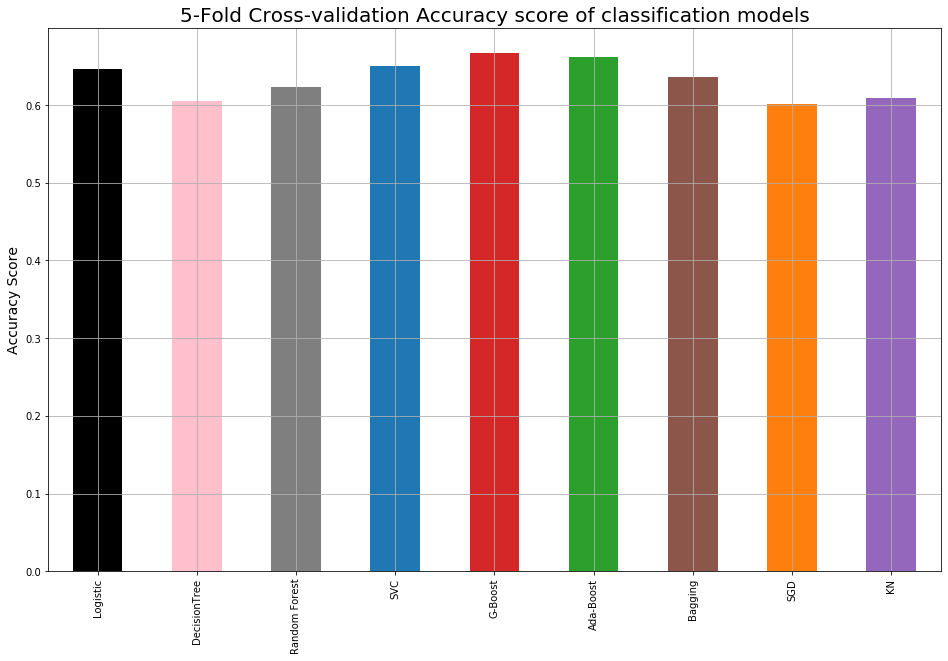

In [1579]:
#visualize the results of classification models
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 10))
s = pd.Series(
    [log,tree,rf,svc,gb,ada,bag,sgd,kn],
    index = ['Logistic', 'DecisionTree', 'Random Forest', 'SVC', 'G-Boost','Ada-Boost','Bagging','SGD','KN'])
my_colors = ['black','pink','tab:gray','tab:blue','tab:red','tab:green','tab:brown','tab:orange','tab:purple']
s.plot(kind='bar',color=my_colors)
plt.title('5-Fold Cross-validation Accuracy score of classification models',fontsize=20)
plt.ylabel('Accuracy Score', fontsize=14)
plt.grid(True)
plt.show()

In [1559]:
#fine tune best behaving models
# Fine tune GradientBoost 
GB_best=GradientBoostingClassifier(max_depth=8, n_estimators=80, min_samples_split=20,min_samples_leaf=10, random_state=15).fit(train_x, train['success-convert'])

# Compute the accuracy scores of different folds in training data
scores_GBbest = cross_val_score(GB_best, train_x, train['success-convert'], cv=5)
scores_GBbest.mean()

0.6742505277295714

In [1572]:
# Fine tune Descision Tree
tree_best = DecisionTreeClassifier(random_state=15, max_depth=20, max_features=150, max_leaf_nodes=20).fit(train_x, train['success-convert'])

# Compute the accuracy scores of different folds in training data
scores_treebest = cross_val_score(tree_best, train_x, train['success-convert'], cv=5)
scores_treebest.mean()

0.6506192634445964

In [1574]:
# Fine tune AdaBoost with Decision Tree
ADA_best=AdaBoostClassifier(base_estimator = tree_best, algorithm='SAMME',learning_rate=0.1, n_estimators=50).fit(train_x, train['success-convert'])

# Compute the accuracy scores of different folds in training data
scores_ADAbest = cross_val_score(ADA_best, train_x, train['success-convert'], cv=5)
scores_ADAbest.mean()

0.6691382531701311

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, '5-Fold Cross-validation score of fine-tuning models')

Text(0, 0.5, 'Accuracy Score')

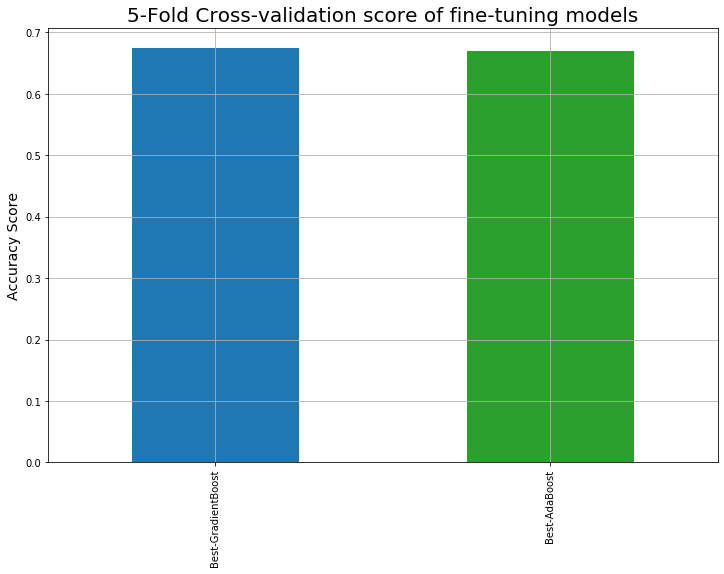

In [1580]:
#visualize model performance after tuning
plt.figure(figsize=(12, 8))
s = pd.Series(
    [scores_GBbest.mean(), scores_ADAbest.mean()],
    index = ['Best-GradientBoost','Best-AdaBoost'])
my_colors = ['tab:blue','tab:green']
s.plot(kind='bar',color=my_colors)
plt.title('5-Fold Cross-validation score of fine-tuning models',fontsize=20)
plt.ylabel('Accuracy Score', fontsize=14)
plt.grid(True)
plt.show()

## Feature Selection experiment: Manually identified features alone 

In [1596]:
# Split into train and validation set
from sklearn.model_selection import train_test_split

train, test = train_test_split(feature_M, test_size=0.2, random_state=15,stratify=feature_M['success-convert'])

train['success-convert'].value_counts()
test['success-convert'].value_counts()

False    15193
True     14345
Name: success-convert, dtype: int64

False    3798
True     3587
Name: success-convert, dtype: int64

In [1597]:
# create a dataframe with only features
train_x=train.drop(columns=['success-convert'])
test_x=test.drop(columns=['success-convert'])

In [1598]:
# Create instance (i.e. object) of LogisticRegression
clf_log = LogisticRegression(random_state=15)
# Fit the model using the training data
logistic_model = clf_log.fit(train_x, train['success-convert'])

# Compute the accuracy scores of different folds in training data
scores_log = cross_val_score(clf_log, train_x, train['success-convert'], cv=5)
scores_log.mean()
log=scores_log.mean()
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores_log.mean(), scores_log.std() * 2))

/Users/xcding/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/xcding/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/xcding/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/xcding/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/xcding/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

0.6467263745812291

In [1599]:
from sklearn.ensemble import GradientBoostingClassifier

clf_gradient = GradientBoostingClassifier(random_state=15).fit(train_x, train['success-convert'])

# Compute the accuracy scores of different folds in training data
scores_gradient = cross_val_score(clf_gradient, train_x, train['success-convert'], cv=5)
scores_gradient.mean()
gb1=scores_gradient.mean()
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores_gradient.mean(), scores_gradient.std() * 2))

0.6617916512075743

In [1600]:
from sklearn.ensemble import AdaBoostClassifier

clf_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3, random_state=15), learning_rate=0.1, n_estimators=40, random_state=15).fit(train_x, train['success-convert'])

# Compute the accuracy scores of different folds in training data
scores_Ada = cross_val_score(clf_ada, train_x, train['success-convert'], cv=5)
scores_Ada.mean()
ada=scores_Ada.mean()
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores_Ada.mean(), scores_Ada.std() * 2))

0.6600650181629292

In [1587]:
#fine tune best behaving models
# Fine tune GradientBoost 
GB_best1=GradientBoostingClassifier(max_depth=8, n_estimators=80, min_samples_split=20,min_samples_leaf=10, random_state=15).fit(train_x, train['success-convert'])

# Compute the accuracy scores of different folds in training data
scores_GBbest1 = cross_val_score(GB_best1, train_x, train['success-convert'], cv=5)
scores_GBbest1.mean()

0.6711355220542649

In [1602]:
# Fine tune AdaBoost with Decision Tree
tree_best = DecisionTreeClassifier(random_state=15, max_depth=20, max_features=40, max_leaf_nodes=20).fit(train_x, train['success-convert'])
ADA_best1=AdaBoostClassifier(base_estimator = tree_best, algorithm='SAMME',learning_rate=0.1, n_estimators=50).fit(train_x, train['success-convert'])

# Compute the accuracy scores of different folds in training data
scores_ADAbest1 = cross_val_score(ADA_best1, train_x, train['success-convert'], cv=5)
scores_ADAbest1.mean()

0.6654479916017155

## Feature Selection experiment: Manually identified features + BoW features 

In [1603]:
# Split into train and validation set
from sklearn.model_selection import train_test_split

train, test = train_test_split(feature_MB, test_size=0.2, random_state=15,stratify=feature_MB['success-convert'])

train['success-convert'].value_counts()
test['success-convert'].value_counts()

False    15193
True     14345
Name: success-convert, dtype: int64

False    3798
True     3587
Name: success-convert, dtype: int64

In [1604]:
# create a dataframe with only features
train_x=train.drop(columns=['success-convert'])
test_x=test.drop(columns=['success-convert'])

In [1605]:
# Create instance (i.e. object) of LogisticRegression
clf_log = LogisticRegression(max_iter=800, random_state=13)
# Fit the model using the training data
logistic_model = clf_log.fit(train_x, train['success-convert'])

# Compute the accuracy scores of different folds in training data
scores_log = cross_val_score(clf_log, train_x, train['success-convert'], cv=5)
scores_log.mean()
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores_log.mean(), scores_log.std() * 2))

/Users/xcding/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/xcding/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/xcding/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/xcding/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/xcding/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to '

0.6446951673301327

In [1607]:
from sklearn.ensemble import GradientBoostingClassifier

clf_gradient = GradientBoostingClassifier(random_state=15).fit(train_x, train['success-convert'])

# Compute the accuracy scores of different folds in training data
scores_gradient = cross_val_score(clf_gradient, train_x, train['success-convert'], cv=5)
scores_gradient.mean()
gb2=scores_gradient.mean()
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores_gradient.mean(), scores_gradient.std() * 2))

0.6640599341703421

In [1608]:
from sklearn.ensemble import AdaBoostClassifier

clf_ada = AdaBoostClassifier(DecisionTreeClassifier(random_state=15, max_depth=3), n_estimators=40,  learning_rate=0.1, random_state=15).fit(train_x, train['success-convert'])

# Compute the accuracy scores of different folds in training data
scores_Ada = cross_val_score(clf_ada, train_x, train['success-convert'], cv=5)
scores_Ada.mean()
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores_Ada.mean(), scores_Ada.std() * 2))

0.659929625741535

In [1609]:
#fine tune best behaving models
# Fine tune GradientBoost 
GB_best2=GradientBoostingClassifier(max_depth=8, n_estimators=80, min_samples_split=20,min_samples_leaf=10, random_state=15).fit(train_x, train['success-convert'])

# Compute the accuracy scores of different folds in training data
scores_GBbest2 = cross_val_score(GB_best2, train_x, train['success-convert'], cv=5)
scores_GBbest2.mean()

0.6699508598579265

In [1610]:
# Fine tune AdaBoost with Decision Tree
ADA_best2=AdaBoostClassifier(base_estimator = tree_best, algorithm='SAMME',learning_rate=0.1, n_estimators=50).fit(train_x, train['success-convert'])

# Compute the accuracy scores of different folds in training data
scores_ADAbest2 = cross_val_score(ADA_best2, train_x, train['success-convert'], cv=5)
scores_ADAbest2.mean()

0.6601329808602969

## Feature Selection experiment: Manually identified features + POS Tag features 

In [1611]:
# Split into train and validation set
from sklearn.model_selection import train_test_split

train, test = train_test_split(feature_MP, test_size=0.2, random_state=15,stratify=feature_MP['success-convert'])

train['success-convert'].value_counts()
test['success-convert'].value_counts()

False    15193
True     14345
Name: success-convert, dtype: int64

False    3798
True     3587
Name: success-convert, dtype: int64

In [1612]:
# create a dataframe with only features
train_x=train.drop(columns=['success-convert'])
test_x=test.drop(columns=['success-convert'])

In [1615]:
from sklearn.ensemble import GradientBoostingClassifier

clf_gradient = GradientBoostingClassifier(random_state=15).fit(train_x, train['success-convert'])

# Compute the accuracy scores of different folds in training data
scores_gradient = cross_val_score(clf_gradient, train_x, train['success-convert'], cv=5)
scores_gradient.mean()
gb3=scores_gradient.mean()
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores_gradient.mean(), scores_gradient.std() * 2))

0.6693075667657997

In [1616]:
#fine tune best behaving models
# Fine tune GradientBoost 
GB_best3=GradientBoostingClassifier(max_depth=8, n_estimators=80, min_samples_split=20,min_samples_leaf=10, random_state=15).fit(train_x, train['success-convert'])

# Compute the accuracy scores of different folds in training data
scores_GBbest3 = cross_val_score(GB_best3, train_x, train['success-convert'], cv=5)
scores_GBbest3.mean()

0.6795993106419648

In [1617]:
# Fine tune AdaBoost with Decision Tree
tree_best = DecisionTreeClassifier(random_state=15, max_depth=20, max_features=50, max_leaf_nodes=20).fit(train_x, train['success-convert'])
ADA_best3=AdaBoostClassifier(base_estimator = tree_best, algorithm='SAMME',learning_rate=0.1,n_estimators=50).fit(train_x, train['success-convert'])

# Compute the accuracy scores of different folds in training data
scores_ADAbest3 = cross_val_score(ADA_best3, train_x, train['success-convert'], cv=5)
scores_ADAbest3.mean()

0.6687996832877555

### Compare Accuracy of four feature data using the best-performed model

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, '5-Fold Cross-validation score of four different collection of features')

Text(0, 0.5, 'Accuracy Score')

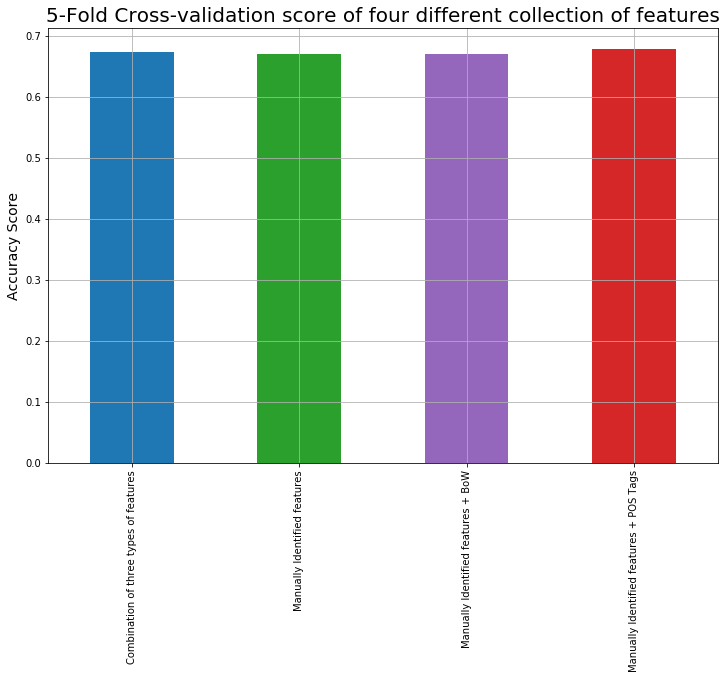

In [1618]:
#visualize model performance after tuning
plt.figure(figsize=(12, 8))
s = pd.Series(
    [scores_GBbest.mean(),scores_GBbest1.mean(),scores_GBbest2.mean(),scores_GBbest3.mean()],
    index = ['Combination of three types of features','Manually Identified features','Manually Identified features + BoW', 'Manually Identified features + POS Tags'])
my_colors = ['tab:blue','tab:green','tab:purple','tab:red']
s.plot(kind='bar',color=my_colors)
plt.title('5-Fold Cross-validation score of four different collection of features',fontsize=20)
plt.ylabel('Accuracy Score', fontsize=14)
plt.grid(True)
plt.show()

## Validate on testing dataset 

### Confusion Matrix

A confusion matrix is a technique for summarizing the performance of a classification algorithm that allows visualization of the performance of an algorithm.
Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa).
The confusion matrix shows the ways in which your classification model is confused when it makes predictions. It gives you insight not only into the errors being made by your classifier but more importantly the types of errors that are being made.

=== Confusion Matrix (Test) ===


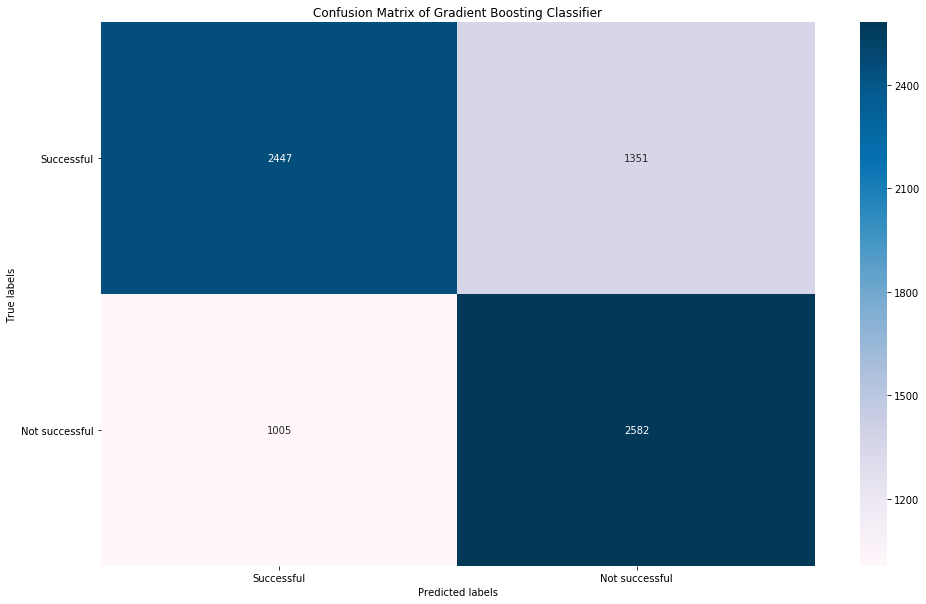

In [1621]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
gb_predict = GB_best3.predict(test_x)
# Create confusion matrix of the training set
print("=== Confusion Matrix (Test) ===")
cm_test = confusion_matrix(test['success-convert'],gb_predict)

# Plot the confusion matrix 
plt.figure(figsize=(16, 10))
ax= plt.subplot()
sns.heatmap(cm_test, annot=True, ax = ax, fmt='g',cmap='PuBu')
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix of Gradient Boosting Classifier')
plt.setp(ax.get_yticklabels(), rotation=360, ha="right",rotation_mode="anchor")
ax.xaxis.set_ticklabels(['Successful','Not successful']); ax.yaxis.set_ticklabels(['Successful','Not successful'])
plt.show();

In [1639]:
accuracy_score(test['success-convert'],gb_predict)
score=accuracy_score(test['success-convert'],gb_predict)

0.6809749492213947

### ROC Curve 

In [1644]:
#ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score, auc, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score
y=test['success-convert']
y_predicted=GB_best3.predict_proba(test_x)[:,1]
false_positive, true_positive, _=roc_curve(y,y_predicted)

<Figure size 1152x720 with 0 Axes>

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'ROC Curve')

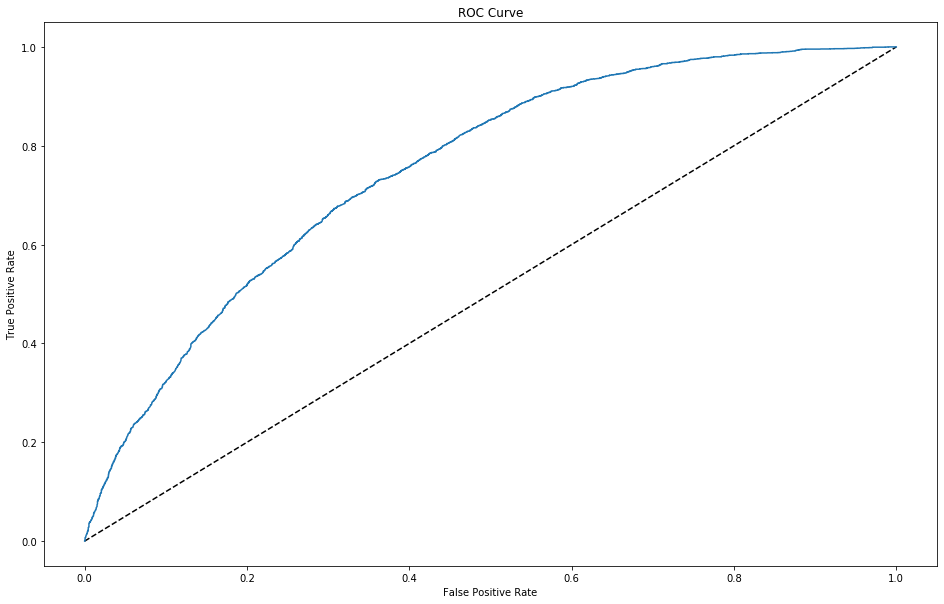

In [1646]:
#Plot ROC
plt.figure(figsize=(16, 10))
plt.plot([0,1],[0,1],'k--')
plt.plot(false_positive, true_positive,label='Gradient Boosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## Feature evaluation

In [1648]:
# Feature importance analysis 
feature_importance = pd.DataFrame(zip(train_x, GB_best3.feature_importances_),columns=['feature','importance'])
feature_importance.sort_values(by='importance', ascending=False).reset_index(drop=True)

,feature,importance
0,Avg. Cost,0.305808
1,h-incent,0.220781
2,NNP_total,0.117854
3,2014,0.081903
4,VB_total,0.037130
5,Broad,0.025608
6,d-greed,0.020439
7,d-vanity,0.016385
8,Phrase,0.016153
9,JJ,0.015232


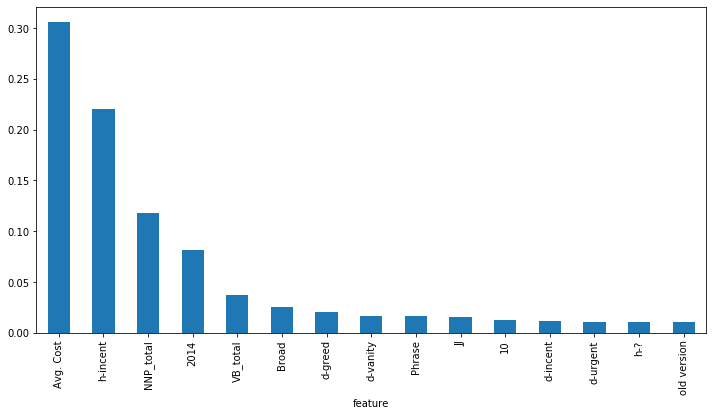

In [1654]:
#visualize feature importance
feature_importance.index=feature_importance['feature']
feature_importance['importance'].nlargest(15).plot(kind='bar')

In [1649]:
#check the value count of worst-performed features
feature_MP['h-sloth'].value_counts()
feature_MP['h-proof'].value_counts()
feature_MP['h-greed'].value_counts()
feature_MP['h-urgent'].value_counts()

False    36917
True         6
Name: h-sloth, dtype: int64

False    36687
True       236
Name: h-proof, dtype: int64

False    36505
True       418
Name: h-greed, dtype: int64

False    36480
True       443
Name: h-urgent, dtype: int64

In [1650]:
#check the value count of best-performed features
feature_MP['h-incent'].value_counts()
feature_MP['d-vanity'].value_counts()
feature_MP['d-greed'].value_counts()
feature_MP['d-incent'].value_counts()
feature_MP['d-urgent'].value_counts()
feature_MP['h-?'].value_counts()
feature_MP['d-no.s'].value_counts()

False    18868
True     18055
Name: h-incent, dtype: int64

False    30042
True      6881
Name: d-vanity, dtype: int64

False    31820
True      5103
Name: d-greed, dtype: int64

False    25160
True     11763
Name: d-incent, dtype: int64

False    34067
True      2856
Name: d-urgent, dtype: int64

False    31414
True      5509
Name: h-?, dtype: int64

True     28101
False     8822
Name: d-no.s, dtype: int64